# Portada

### Estudiantes:

    Jason Solano 

    Percy herrara
### Curso
    Inteligencia de negocios y mineria de datos
### Trabajo
    Projecto Final 

# Fase de Entendimiento del negocio

## Objetivos del negocio

- Facilitar el pronóstico de cuentas que pueden ser incobrables a un largo plazo para poder establecer un arreglo de pago para realizar una liquidación adecuada de la cuenta.


- Poder ofrecer una herramienta para el diseño robusto de campañas de cobro de carteras de crédito, las cuales pueden estar conformadas con cuentas que pueden ser incobrables.


## Criterios de éxito en términos de negocio

- Lograr la identificación exitosa de cuentas que pueden ser incobrables para una entidad financiera, reduciendo la cantidad de cuentas incobrables al menos en 30% de acuerdo a los datos históricos de la entidad financiero.


- Mostrar a las entidades financieros cuales son los atributos de los clientes  que lo puede llevar a ser una cuenta incobrable para poder facilitar la estadística descriptiva de la entidad financiera.

## Objetivos de minería de datos

- Identificar por medio de modelos de predicción potenciales cuentas que puedan ser incobrables en un futuro, para ofrecer una liquidación por medio de un arreglo de pago.

- Identificar cuales son los atributos que más influyen para determinar si una cuenta se le debe realizar la oferta de liquidación debido a que  es catalogada como incobrabl


## Criterios de éxito para la minería de datos

- Obtener al menos un modelo que presente un accuracy (métrica de precisión para exactitud) mayor a un 70% con la utilización de datos externos a los utilizados en el entrenamiento.

- Optimizar con diferentes parámetros al menos tres modelos utilizados para la predicción en la categoría de clasificación binaria.


# Fase de Entendimiento de los datos

## Información del conjunto de datos

- Lista de conjuntos de datos requerido
    - Bases de datos PostgreSQL de cuentas de carteras de crédito.
- Método de acceso
    - Query de SQL para una base de datos que contiene información de carteras de crédito.
- Ubicación de los datasets:
    - La ubicación de la base de datos, es confidencial debido a la naturaleza de los datos.

## Descripción de los datos

### Información del conjunto de datos


El conjunto de datos es sobre información de campaña de recoleccion de dineros de cuentas en mora, es la información sobre clientes contactados, con una oferta concreta para cerrar su cuenta en mora por un monto inferior al actual.

El conjunto de datos esta separado por dos archivos CSV, los cuales vamos a unir

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('proyectoF1T.csv')
df2 = pd.read_csv('proyectoF2F.csv')
print(df1.shape)
df1.head()

(2595, 31)


id  approval_amount recommendation                   redeem_ts  \
0  503603788            250.0        APPROVE  2019-01-24 09:50:41.115000   
1  399999590             80.0        APPROVE  2019-01-24 17:34:47.768000   
2  330633304            956.0        APPROVE  2019-01-24 18:18:53.120000   
3  422247835              9.0        APPROVE  2019-01-24 18:36:06.694000   
4  427183074            250.0        APPROVE  2019-01-25 08:47:49.726000   

   contacted          email_contacted_ts            sms_contacted_ts  \
0      False                         NaN  2019-01-24 09:36:27.784000   
1      False  2019-01-24 12:16:54.626000                         NaN   
2      False  2019-01-24 13:17:29.359000  2019-01-24 13:15:59.087000   
3      False                         NaN  2019-01-24 13:19:17.988000   
4      False  2019-01-24 09:08:46.690000  2019-01-24 09:08:20.447000   

     birth_dt state         city         ...           account_payment_method  \
0  1988-05-21    CO       Aurora         ...                           MANUAL   
1  1998-01-13    TX  Weatherford         ...                           MANUAL   
2  1975-12-09    WA      Othello         ...                           MANUAL   
3  1985-09-09    CA     Imperial         ...                           MANUAL   
4  1980-11-23    OH    Cleveland         ...                           MANUAL   

  collections_category  days_past_due  number_of_payments amount_financed  \
0                  NaN              0                  52             NaN   
1                  NaN              0                  26             0.0   
2                  NaN              0                  12             0.0   
3                  NaN              0                  26             0.0   
4                  NaN              0                  26             0.0   

   data_correction merchant_id    source initial_decision  last_payment_amount  
0            False    14206566  MERCHANT         APPROVED                70.34  
1            False   107313386  INTERNET         APPROVED                  NaN  
2            False   230266536  MERCHANT         APPROVED                  NaN  
3            False   332752404  MERCHANT         APPROVED                  NaN  
4            False   358414568  MERCHANT         APPROVED                  NaN  

[5 rows x 31 columns]

### Se realiza la unión de los dos datasets

Por lo cual se puede ver la cantidad de registros y columnas.

Cantidad Registros: 6095

Cantidad de columnas: 31

In [2]:
df1 = df1.append(df2)
df2 = None    
print(df1.shape)

(6095, 31)


### Se observan las variables del dataset

In [3]:
df1.columns

Index(['id', 'approval_amount', 'recommendation', 'redeem_ts', 'contacted',
       'email_contacted_ts', 'sms_contacted_ts', 'birth_dt', 'state', 'city',
       'zip_code', 'rent_or_own', 'months_at_current_residence',
       'years_at_current_residence', 'direct_deposit', 'black_listed',
       'language_preference', 'military_applicant', 'payment_frequency',
       'scheduled_payment_amt', 'past_due_amt', 'account_payment_method',
       'collections_category', 'days_past_due', 'number_of_payments',
       'amount_financed', 'data_correction', 'merchant_id', 'source',
       'initial_decision', 'last_payment_amount'],
      dtype='object')

## Explicación de las columnas

- id
    - Id de cada fila.
- merchant_id
    - Id para cada comerciante.
- last_payment_amount
    - La cantidad del último pago realizado.
- birth_dt
    - Fecha de cumpleaños de cada cliente
- redeem_ts
    - Personas a las cuales se les debe ofrecer la oferta de liquidación, fecha que se hizo.
- account_payment_method
    - Forma de pago configurada para la cuenta.
- approval_amount
    - Monto aprobado del préstamo.
- scheduled_payment_amt
    - Monto de la cuota configurada para el préstamo.
- days_past_due
    - Días en que acumula en mora la cuenta.
- past_due_amt
    - Monto que se encuentra en atraso para la cuenta.
- zip_code
    - Código postal del cliente al cual le pertenece la cuenta.
- age
    - Edad del cliente de la cuenta.
- city
    - Ciudad de domicilio del cliente.
- sms_contacted_ts
    - Fecha en que se le contactó por medio de mensaje de texto al celular.
- state
    - Estado de domicilio de la persona de la cuenta.
- years_at_current_residence
    - Años viviendo en la actual residencia.
- months_at_current_residence
    - Meses viviendo en la actual residencia.
- source
    - Fuente desde donde se genero el préstamo (Internet, Agencia, etc).
- collections_category
    - Columna no especificamente descripta.
- email_contacted_ts
    - Fecha en que se le contactó por medio de correo electrónico.
- payment_frequency
    - Frecuencia de pago de la cuenta.
- number_of_payments
    - Cantidad de pagos necesarios para cancelar la cuenta.
- rent_or_own
    - Es propietario de vivienda o renta.
- initial_decision
    - Decisión inicial al crear la cuenta (Aprobación o Denegar).
- language_preference
    - Lenguaje en que prefiere el cliente ser contactado (Español o Inglés).
- contacted
    - Si se logró contactar anteriormente.
- data_correction
    - Si se tuvo que corregir los datos del cliente en algún momento (True, False).
- black_listed
    - Si en algún momento el cliente fue incluido en lista negra por fraude.
- direct_deposit
    - Si la el préstamo está configurado para recibir los pagos de forma automática por depósito.
- recommendation
    - Recomendación que se señaló al formalizar la cuenta (Aprobar o Denegar).
- military_applicant
    - Si el cliente es veterano o actualmente miembro de la fuerza militar.


### Tipos de datos

    id                               int64

    approval_amount                float64

    recommendation                  string

    redeem_ts                         date

    contacted                         bool

    email_contacted_ts                date

    sms_contacted_ts                  date

    birth_dt                          date

    state                           string

    city                            string

    zip_code                         int64

    rent_or_own                     string

    months_at_current_residence      int64

    years_at_current_residence       int64

    direct_deposit                    bool

    black_listed                      bool

    language_preference             string

    military_applicant                bool

    payment_frequency               string

    scheduled_payment_amt          float64

    past_due_amt                   float64

    account_payment_method          string

    collections_category            string

    days_past_due                    int64

    number_of_payments               int64

    amount_financed                float64

    data_correction                   bool

    merchant_id                      int64

    source                          string

    initial_decision                string

    last_payment_amount            float64

### Datos generales del conjunto de datos

In [4]:
df1.describe()

id  approval_amount       zip_code  \
count  6.095000e+03      6095.000000    6095.000000   
mean   4.565517e+08       557.357670   61592.610008   
std    1.730670e+08       371.192573   28386.361369   
min    4.396600e+04         3.000000       0.000000   
25%    3.692606e+08       274.000000   33012.000000   
50%    4.760580e+08       487.000000   76119.000000   
75%    5.770807e+08       764.000000   85041.000000   
max    8.277996e+08      2899.000000  320568.000000   

       months_at_current_residence  years_at_current_residence  \
count                  6095.000000                 6095.000000   
mean                      2.070057                    3.547990   
std                       3.213727                    3.137995   
min                       0.000000                    0.000000   
25%                       0.000000                    1.000000   
50%                       0.000000                    3.000000   
75%                       3.000000                    6.000000   
max                      24.000000                   48.000000   

       scheduled_payment_amt  past_due_amt  days_past_due  number_of_payments  \
count            6095.000000   6095.000000    6095.000000         6095.000000   
mean              107.171736     94.349810      14.462510           32.452174   
std                89.448125    357.118752      46.452751           14.133418   
min               -83.120000      0.000000       0.000000           12.000000   
25%                48.040000      0.000000       0.000000           24.000000   
50%                80.430000      0.000000       0.000000           26.000000   
75%               134.450000      0.000000       0.000000           52.000000   
max               696.710000   3714.450000     337.000000           52.000000   

       amount_financed   merchant_id  last_payment_amount  
count           2855.0  6.095000e+03          3044.000000  
mean               0.0  1.991524e+08           117.082050  
std                0.0  1.718332e+08           102.038427  
min                0.0  2.110000e+02         -1344.000000  
25%                0.0  1.853463e+07            62.007500  
50%                0.0  1.660589e+08            93.760000  
75%                0.0  3.524943e+08           146.012500  
max                0.0  4.902396e+08          2240.740000

Por medio del describe se nos muestra un summary de cuartiles, cantidad de registros,la media y desviación estandar

## Exploración de los datos y verificación de datos

Para esta sección se aplicaran ambos casos, aunque también se ha aplicado exploración de los datos en la sección anterior.

### Analisis de variables nulas

En la siguiente sección se evaluara la cantidad de nulos, esta cantidad sera mostrada por medio del porcentaje de nulos para cada columna.

In [5]:
df1.isna().mean().round(4)

id                             0.0000
approval_amount                0.0000
recommendation                 0.0000
redeem_ts                      0.5742
contacted                      0.0000
email_contacted_ts             0.0786
sms_contacted_ts               0.3993
birth_dt                       0.0000
state                          0.0000
city                           0.0003
zip_code                       0.0000
rent_or_own                    0.0000
months_at_current_residence    0.0000
years_at_current_residence     0.0000
direct_deposit                 0.0028
black_listed                   0.0000
language_preference            0.0000
military_applicant             0.0000
payment_frequency              0.0000
scheduled_payment_amt          0.0000
past_due_amt                   0.0000
account_payment_method         0.0000
collections_category           0.4167
days_past_due                  0.0000
number_of_payments             0.0000
amount_financed                0.5316
data_correct

Se puede observar existe varias columnas que contienen un alto porcentaje de nulos, por lo cual en la siguiente fase seran evaluadas.

### Análisis para conversión de datos

Algunas variables presentan valores nulos, que en una representación binaria serian de un valor cero y si contienen datos serian un valor 1.

**sms_contacted_ts**

Esta columna aplica para los nulos equivalen a personas que no fueron contactadas por SMS, esta información si es importante para nuestro análisis, en la siguiente fase remplazaremos estos valores por valores booleanos para identificar las personas contactadas por este medio.

**emal_contacted**

Esta columna aplica para los nulos equivalen a personas que no fueron contactadas por email, esta información si es importante para nuestro análisis, en la siguiente fase remplazaremos estos valores por valores booleanos para identificar las personas contactadas por este medio.

**redeem_ts**

Un caso muy similar a las otra columnas donde los valores nulos serian personas que no se le presentaron oferta, y las instancias con valores de fecha serian las personas que si se le presentaron una oferta.

**direct_deposit**

Columna Booleana que indica si se hizo un depósito directo, para el caso de los valores nulos que se encuentran seran tomados como falsos.

# Fase de Preparación de los datos

## Limpieza de los datos y selección de datos

Durante esta sección veremos algunos datos descartados y limpieza de valores nulos.

### Realizamos la conversión de datos nulos
Como se menciona anteriormente tratamos las variables con valores nulos que pueden ser interpretados como booleanos.

In [6]:
df1.loc[~df1.email_contacted_ts.isnull(),"email_contacted_ts"]=True 
df1.loc[~df1.sms_contacted_ts.isnull(),"sms_contacted_ts"]=True 
df1.loc[~df1.direct_deposit.isnull(),"direct_deposit"]=True 
df1.loc[~df1.redeem_ts.isnull(),"redeem_ts"]=True 
df1["email_contacted_ts"].fillna(False, inplace = True) 
df1["sms_contacted_ts"].fillna(False, inplace = True)
df1["direct_deposit"].fillna(False, inplace = True)
df1["redeem_ts"].fillna(False, inplace = True) 
df1.head()

id  approval_amount recommendation  redeem_ts  contacted  \
0  503603788            250.0        APPROVE       True      False   
1  399999590             80.0        APPROVE       True      False   
2  330633304            956.0        APPROVE       True      False   
3  422247835              9.0        APPROVE       True      False   
4  427183074            250.0        APPROVE       True      False   

   email_contacted_ts  sms_contacted_ts    birth_dt state         city  \
0               False              True  1988-05-21    CO       Aurora   
1                True             False  1998-01-13    TX  Weatherford   
2                True              True  1975-12-09    WA      Othello   
3               False              True  1985-09-09    CA     Imperial   
4                True              True  1980-11-23    OH    Cleveland   

          ...           account_payment_method collections_category  \
0         ...                           MANUAL                  NaN   
1         ...                           MANUAL                  NaN   
2         ...                           MANUAL                  NaN   
3         ...                           MANUAL                  NaN   
4         ...                           MANUAL                  NaN   

   days_past_due  number_of_payments  amount_financed  data_correction  \
0              0                  52              NaN            False   
1              0                  26              0.0            False   
2              0                  12              0.0            False   
3              0                  26              0.0            False   
4              0                  26              0.0            False   

  merchant_id    source initial_decision  last_payment_amount  
0    14206566  MERCHANT         APPROVED                70.34  
1   107313386  INTERNET         APPROVED                  NaN  
2   230266536  MERCHANT         APPROVED                  NaN  
3   332752404  MERCHANT         APPROVED                  NaN  
4   358414568  MERCHANT         APPROVED                  NaN  

[5 rows x 31 columns]

Nuevamente se vuelve a comprobar los valores que son nulos.

In [7]:
df1.isna().mean().round(4)

id                             0.0000
approval_amount                0.0000
recommendation                 0.0000
redeem_ts                      0.0000
contacted                      0.0000
email_contacted_ts             0.0000
sms_contacted_ts               0.0000
birth_dt                       0.0000
state                          0.0000
city                           0.0003
zip_code                       0.0000
rent_or_own                    0.0000
months_at_current_residence    0.0000
years_at_current_residence     0.0000
direct_deposit                 0.0000
black_listed                   0.0000
language_preference            0.0000
military_applicant             0.0000
payment_frequency              0.0000
scheduled_payment_amt          0.0000
past_due_amt                   0.0000
account_payment_method         0.0000
collections_category           0.4167
days_past_due                  0.0000
number_of_payments             0.0000
amount_financed                0.5316
data_correct

### Eliminación de  columnas y filas que contengan datos nulos

En este proceso se realiza la primera escogencia de datos.

Al observar las siguientes columnas que contienen una gran cantidad de nulos seran borradas:

collections_category

amount_financed

last_payment_amount

Por otra parte se decide borrar un porcentaje pequeño de filas equivalente al 0.0003, 

pertenecientes a valores nulos



In [8]:
df1 = df1.drop(columns=['collections_category','amount_financed','last_payment_amount'])

In [9]:
df1.shape

(6095, 28)

Se borran el 0.0003 de filas pertenecientes a valores nulos de city

In [10]:
df1 = df1.dropna()
df1.shape

(6093, 28)

### Volvemos a observar el porcentaje de nulos

In [11]:
df1.isna().mean().round(4)

id                             0.0
approval_amount                0.0
recommendation                 0.0
redeem_ts                      0.0
contacted                      0.0
email_contacted_ts             0.0
sms_contacted_ts               0.0
birth_dt                       0.0
state                          0.0
city                           0.0
zip_code                       0.0
rent_or_own                    0.0
months_at_current_residence    0.0
years_at_current_residence     0.0
direct_deposit                 0.0
black_listed                   0.0
language_preference            0.0
military_applicant             0.0
payment_frequency              0.0
scheduled_payment_amt          0.0
past_due_amt                   0.0
account_payment_method         0.0
days_past_due                  0.0
number_of_payments             0.0
data_correction                0.0
merchant_id                    0.0
source                         0.0
initial_decision               0.0
dtype: float64

Por lo tanto en este momento el dataset queda sin valores nulos

### Se borran columnas que son que algún tipo de ID

Dichas  columnas no presentan valor para los algoritmos de clasificación, que contienen un ID unico para cada columna

In [12]:
df1 = df1.drop(columns=['merchant_id','id'])

In [13]:
df1.shape

(6093, 26)

Por lo tanto se han descartado u total de 5 variables y borrado todo los datos nulos.

### Conclusión de preselección y limpieza de datos

Al terminar esta sección de limpieza de datos se identifican variables con alto porcentaje de datos nulos donde es mejor eliminarlas ya que possen mas de un 40% de valores nulos.

Por otra parte existen columnas que son ID para cada fila, estas columnas tambien son borradas ya que no presenta un valor  para los algoritmos de machine learning.

## Transformaciones aplicadas a los datos

### Transformación de datos categóricos con un ordinal encoder

Para probar el random forest para detectar las variables mas importantes, tranfomaremos las variables categóricas de forma ordinal, ya que los desicion trees no se ven tan afectados por datos categóricos que son transformados por esta forma.

Los datos categoricos a transformar son:


redeem_ts

contacted

email_contacted_ts

sms_contacted_ts

state

city

payment_frequency

rent_or_own

account_payment_method

data_correction

source

initial_decision

direct_deposit

language_preference

recomendation

military_applicant

black_listed


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df1.redeem_ts = encoder.fit_transform(df1.redeem_ts.values.reshape(-1, 1))
df1.contacted = encoder.fit_transform(df1.contacted.values.reshape(-1, 1))
df1.email_contacted_ts = encoder.fit_transform(df1.email_contacted_ts.values.reshape(-1, 1))
df1.sms_contacted_ts = encoder.fit_transform(df1.sms_contacted_ts.values.reshape(-1, 1))
df1.state = encoder.fit_transform(df1.state.values.reshape(-1, 1))
df1.city = encoder.fit_transform(df1.city.values.reshape(-1, 1))
df1.payment_frequency = encoder.fit_transform(df1.payment_frequency.values.reshape(-1, 1))
df1.rent_or_own = encoder.fit_transform(df1.rent_or_own.values.reshape(-1, 1))
df1.account_payment_method = encoder.fit_transform(df1.account_payment_method.values.reshape(-1, 1))
df1.data_correction = encoder.fit_transform(df1.data_correction.values.reshape(-1, 1))
df1.source = encoder.fit_transform(df1.source.values.reshape(-1, 1))
df1.initial_decision = encoder.fit_transform(df1.initial_decision.values.reshape(-1, 1))
df1.direct_deposit = encoder.fit_transform(df1.direct_deposit.values.reshape(-1, 1))
df1.language_preference = encoder.fit_transform(df1.language_preference.values.reshape(-1, 1))
df1.recommendation = encoder.fit_transform(df1.recommendation.values.reshape(-1, 1))
df1.military_applicant = encoder.fit_transform(df1.military_applicant.values.reshape(-1, 1))
df1.black_listed = encoder.fit_transform(df1.black_listed.values.reshape(-1, 1))

In [15]:
df1.head()

approval_amount  recommendation  redeem_ts  contacted  email_contacted_ts  \
0            250.0             0.0        1.0        0.0                 0.0   
1             80.0             0.0        1.0        0.0                 1.0   
2            956.0             0.0        1.0        0.0                 1.0   
3              9.0             0.0        1.0        0.0                 0.0   
4            250.0             0.0        1.0        0.0                 1.0   

   sms_contacted_ts    birth_dt  state    city  zip_code        ...         \
0               1.0  1988-05-21    5.0    73.0     80012        ...          
1               0.0  1998-01-13   41.0  1590.0     76086        ...          
2               1.0  1975-12-09   45.0  1086.0     99344        ...          
3               1.0  1985-09-09    4.0   684.0     92251        ...          
4               1.0  1980-11-23   33.0   264.0     44105        ...          

   military_applicant  payment_frequency  scheduled_payment_amt  past_due_amt  \
0                 0.0                4.0                  18.84           0.0   
1                 0.0                0.0                  32.88           0.0   
2                 0.0                1.0                 423.50           0.0   
3                 0.0                0.0                  18.15           0.0   
4                 0.0                0.0                  87.73           0.0   

   account_payment_method  days_past_due  number_of_payments  data_correction  \
0                     2.0              0                  52              0.0   
1                     2.0              0                  26              0.0   
2                     2.0              0                  12              0.0   
3                     2.0              0                  26              0.0   
4                     2.0              0                  26              0.0   

   source  initial_decision  
0     2.0               0.0  
1     0.0               0.0  
2     2.0               0.0  
3     2.0               0.0  
4     2.0               0.0  

[5 rows x 26 columns]

## Construcción de nuevos datos (atributos)

Para este caso vamos a construir una nueva variable age, apartir de la variable birth_dt, por lo tanto seria un nuevo atributo.

In [17]:
now = pd.Timestamp('now')
df1['birth_dt'] = pd.to_datetime(df1['birth_dt'])   
df1['age'] = (now - df1['birth_dt']).astype('<m8[Y]') 
df1 = df1.drop(columns=['birth_dt'])

In [18]:
df1.age.head()

0    31.0
1    22.0
2    44.0
3    34.0
4    39.0
Name: age, dtype: float64

## Selección de los datos

Para la selección final de datos vamos a aplicar un random forest el cual no permite escoger por medio de un nivel de importancia los atributos que mas no favorecen a la hora entrenar los algoritmos de predicción

### Balanceo de datos

En nuestro caso la columna **redeem_ts** viene siendo nuestro label para aplicar la clasificación, por lo tanto se realiza un balance entre cuendo se realizo oferta y no se realizo oferta.

Se convierte la columna **redeem_ts** en one hot coding

In [21]:
redeem = df1[(df1['redeem_ts'] == 1)]
noRedeem = df1[(df1['redeem_ts'] == 0)]

In [22]:
print(redeem.shape,noRedeem.shape)

(2595, 26) (3498, 26)


Al observar los datos se puede ver que existen más datos de no oferta a oferta, por lo cual se escogen 2595 filas de no oferta para realizar un correcto balance

In [23]:
dfBalanceado = pd.concat([redeem,noRedeem.sample(redeem.shape[0])])

### Probamos la extracción de los variables mas importantes utilizando el random forest

 Se separan los features y labels

In [24]:
labels = df1['redeem_ts']
features = df1.drop(columns=['redeem_ts'])

Se separan los datos de entrenamiento para el random forest

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.15,random_state=13)

Se presenta una configuración recomenda para dicha tarea, mas adelante en la fase de modelado se aplicara una mejor escogencia de parámetros para este mismo algoritmo.

In [27]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

#### Realizamos el análisis para obtener las variables mas importantes

In [28]:
importances = pd.DataFrame({'feature' :features.columns, 'importance':RandomForestModel.feature_importances_})

In [29]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

importance
feature                                
account_payment_method         0.224321
approval_amount                0.188819
scheduled_payment_amt          0.083982
days_past_due                  0.064521
zip_code                       0.058695
age                            0.056809
past_due_amt                   0.055592
city                           0.055350
sms_contacted_ts               0.038639
state                          0.033293
years_at_current_residence     0.031959
months_at_current_residence    0.023558
source                         0.019083
email_contacted_ts             0.016261
payment_frequency              0.015773
number_of_payments             0.014557
rent_or_own                    0.007484
initial_decision               0.005961
language_preference            0.004128
contacted                      0.000663
data_correction                0.000315
black_listed                   0.000161
direct_deposit                 0.000074
military_applicant             0.000000
recommendation                 0.000000

Por lo tanto de acuerdo al análisis del random forest se puede observar que los datos mas impotantes que presentan al menos un 1% del total de importancia: 

In [30]:
importances.index[:16]

Index(['account_payment_method', 'approval_amount', 'scheduled_payment_amt',
       'days_past_due', 'zip_code', 'age', 'past_due_amt', 'city',
       'sms_contacted_ts', 'state', 'years_at_current_residence',
       'months_at_current_residence', 'source', 'email_contacted_ts',
       'payment_frequency', 'number_of_payments'],
      dtype='object', name='feature')

Antes de selecionar estos datos, como hemos realizado la limpieza de datos vamos a realizar un graficación de los datos, cabe destacar que este apartado **también pertenece** a la sección **entendimiento de los datos y exploración de los datos**, con la graficación podemos enteder mejor las variables.

### Graficación de columnas por medio de histogramas

La siguiente función es utilizada para graficar los histogramas de cada columna

In [44]:
def plotHistrogram(features):
    for i in features:
        print("Columna a graficar: ",i)
        classes = pd.value_counts(dfBalanceado[i][dfBalanceado.redeem_ts == 1], sort = True)
        classes.plot(kind = 'bar', rot=0)
        plt.title("Se realizo Oferta")
        plt.xlabel(i)
        plt.ylabel("Frequency")
        plt.show()
        classes = pd.value_counts(dfBalanceado[i][dfBalanceado.redeem_ts == 0], sort = True)
        classes.plot(kind = 'bar', rot=0)
        plt.title("No se realizo oferta")
        plt.xlabel(i)
        plt.ylabel("Frequency")
        plt.show()

Algunos gráficos no se podran enterder muy bien debido a la naturaliza de los datos.

Columna a graficar:  account_payment_method


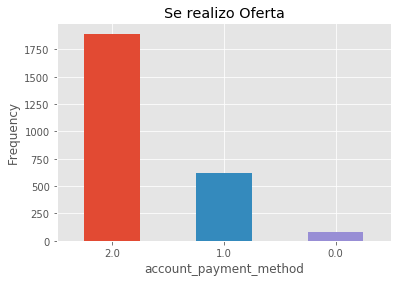

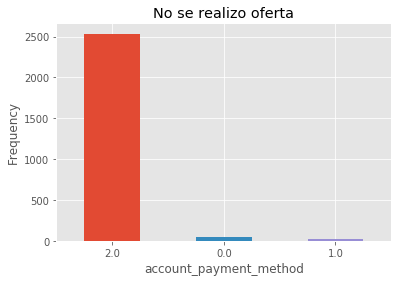

Columna a graficar:  approval_amount


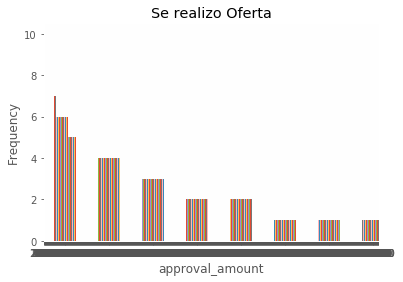

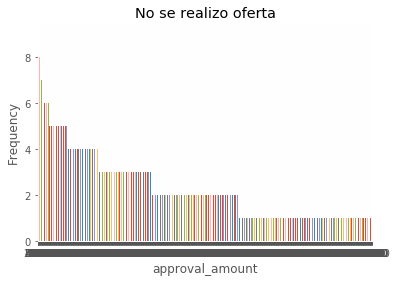

Columna a graficar:  scheduled_payment_amt


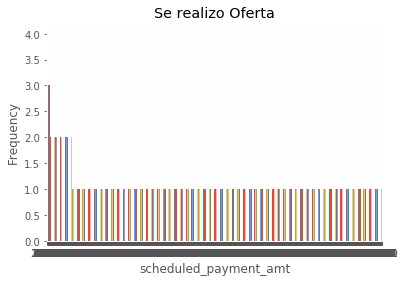

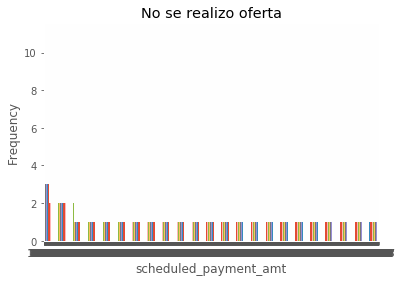

Columna a graficar:  days_past_due


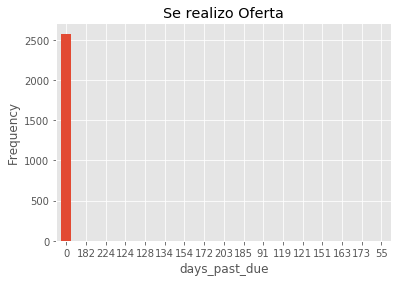

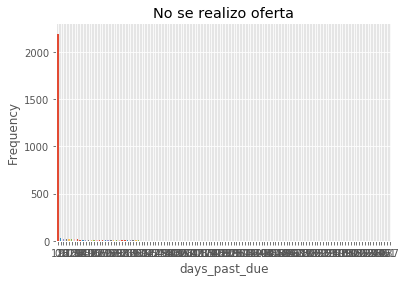

Columna a graficar:  zip_code


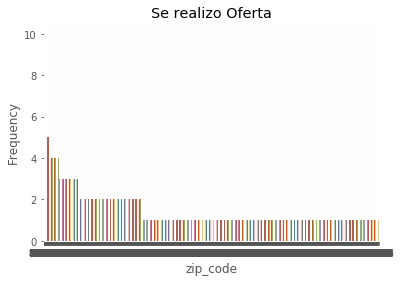

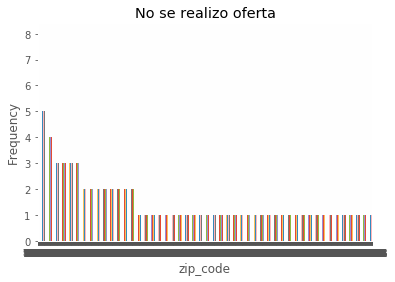

Columna a graficar:  age


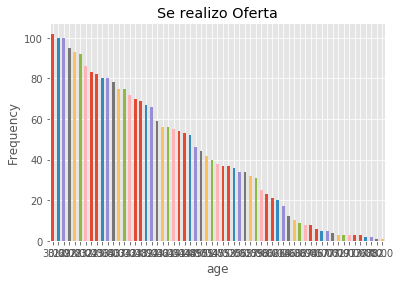

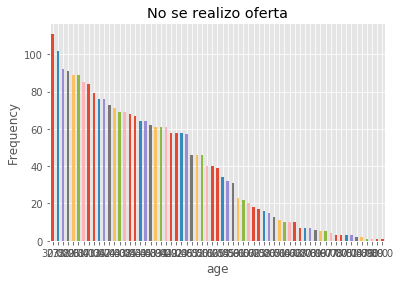

Columna a graficar:  past_due_amt


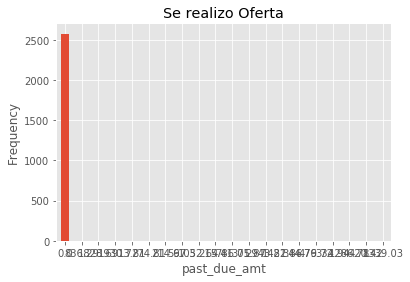

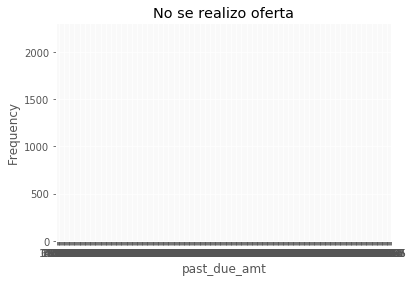

Columna a graficar:  city


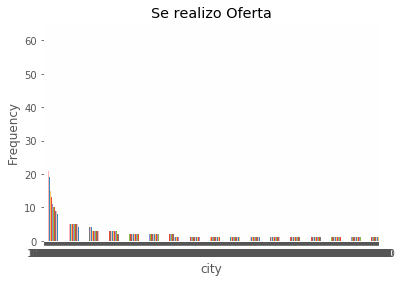

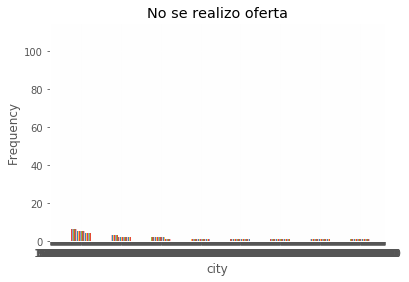

Columna a graficar:  sms_contacted_ts


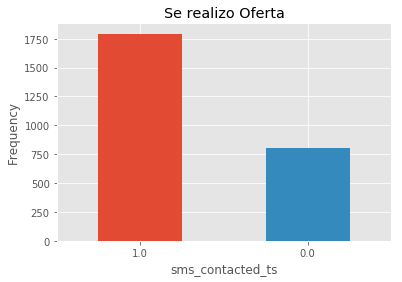

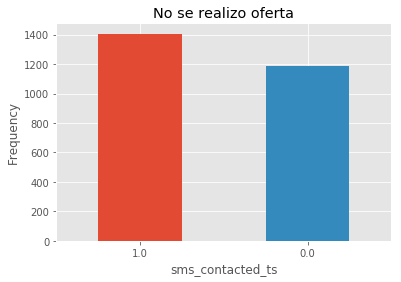

Columna a graficar:  state


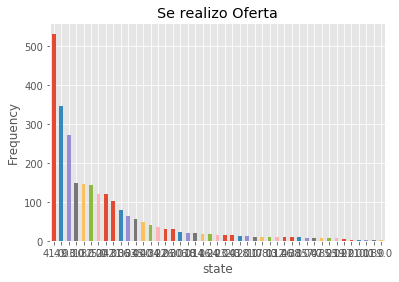

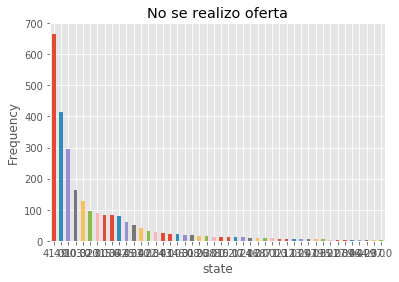

Columna a graficar:  years_at_current_residence


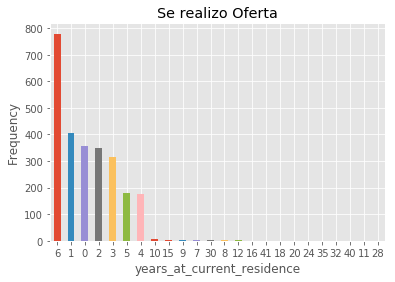

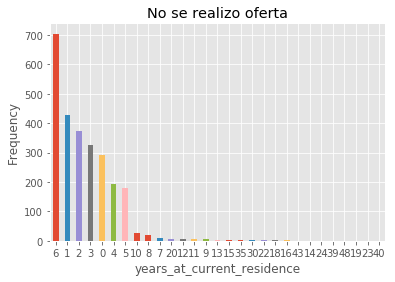

Columna a graficar:  months_at_current_residence


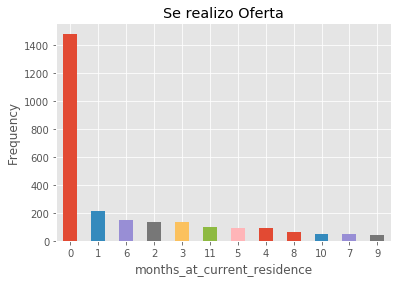

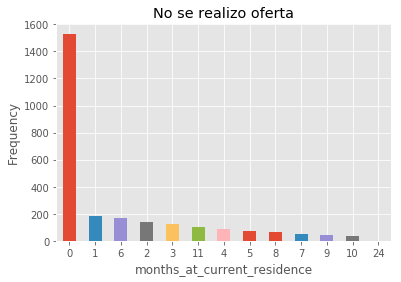

Columna a graficar:  source


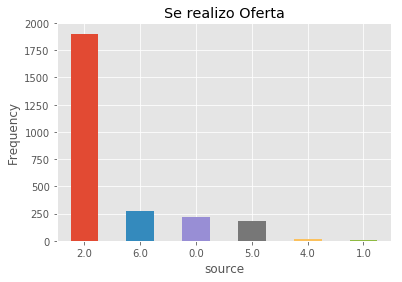

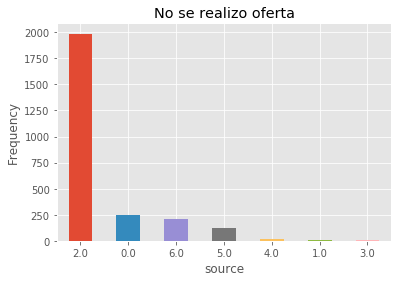

Columna a graficar:  email_contacted_ts


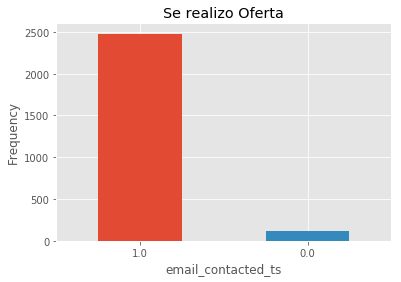

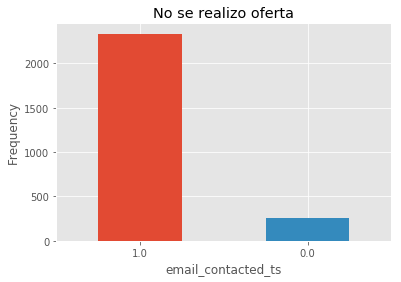

Columna a graficar:  payment_frequency


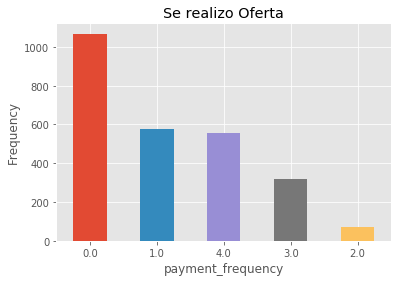

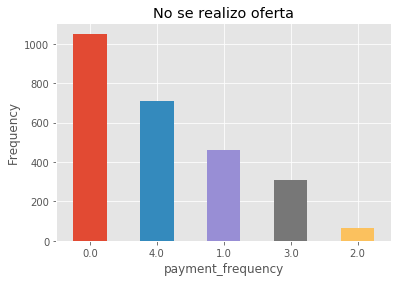

Columna a graficar:  number_of_payments


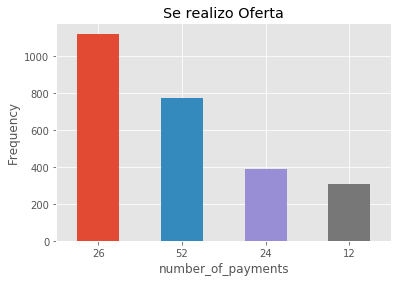

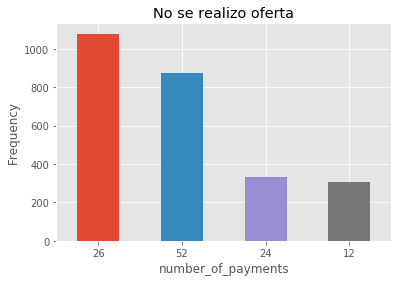

Columna a graficar:  rent_or_own


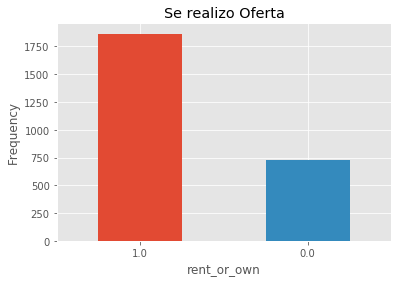

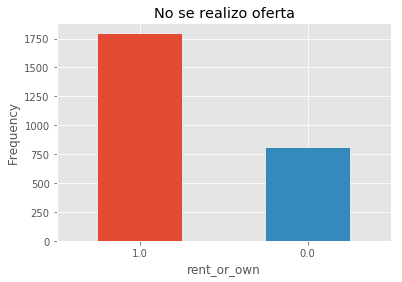

Columna a graficar:  initial_decision


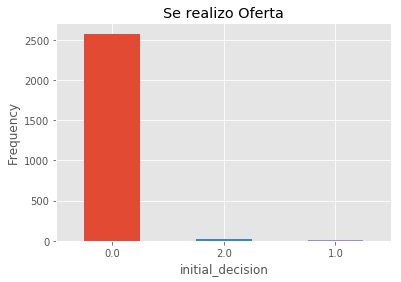

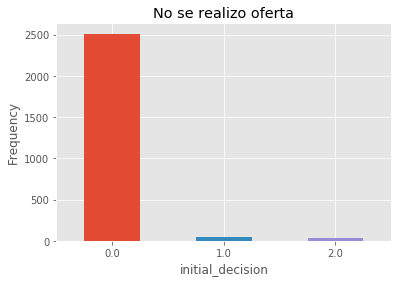

Columna a graficar:  language_preference


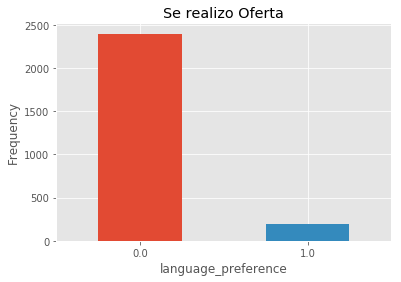

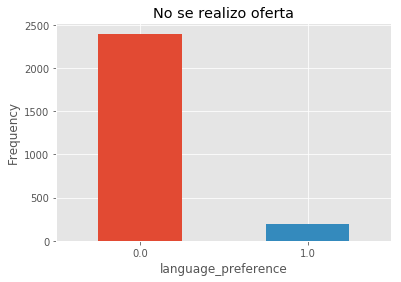

Columna a graficar:  contacted


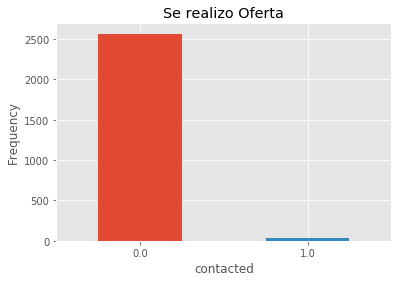

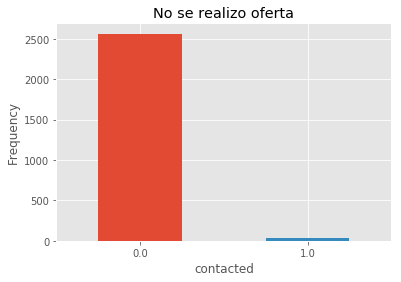

Columna a graficar:  data_correction


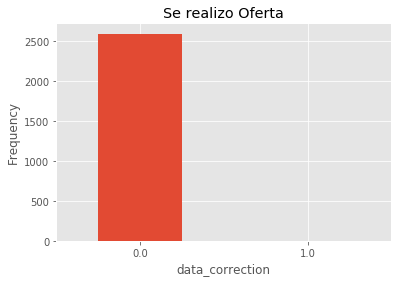

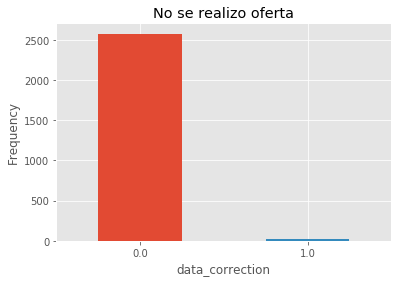

Columna a graficar:  black_listed


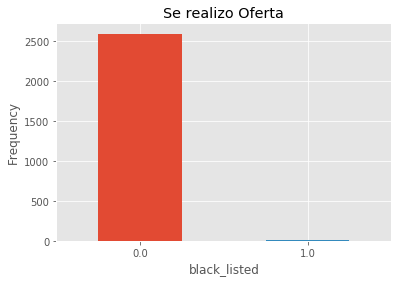

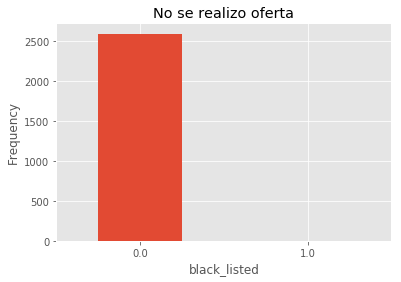

Columna a graficar:  direct_deposit


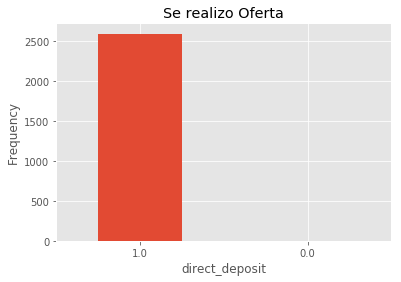

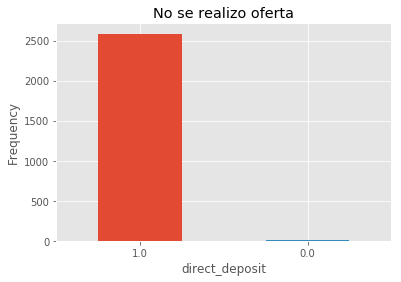

Columna a graficar:  military_applicant


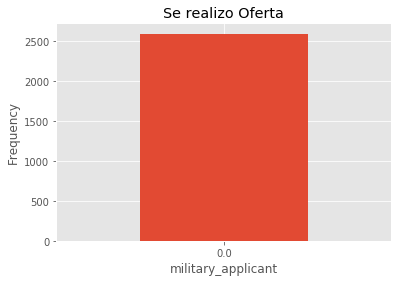

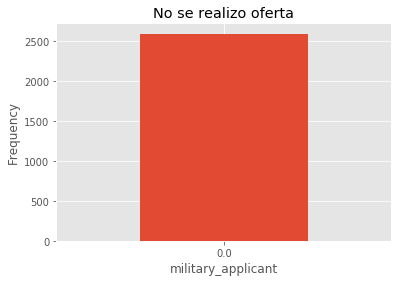

Columna a graficar:  recommendation


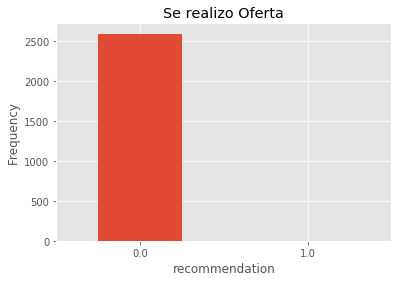

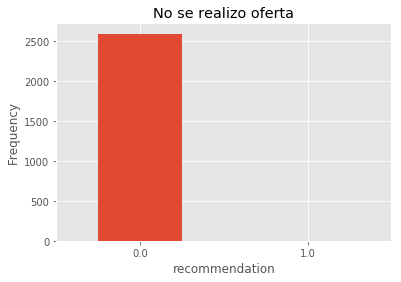

In [45]:
plotHistrogram(importances.index)

### Analisis de los gráficos

**Existen columnas o variables del dataset que son difíciles de apreciar por medio de estos gráficos, sin embargo analizaremos los mas destacados.**

Se analizara la distribución entre las cuentas que se les ofrecio una oferta y no las que no se  les ofrecio, asi como su distribución. Por ejemplo:

- **account_payment_method:** presenta datos balanceados con respecto a la oferta y no oferta, sin embargo sus atributos no se encuentran muy balanceados.
- **sms_contacted_ts:** presenta un buen balance con respecto a oferta y no oferta, sin embargo presenta un desbalance con respecto al atributo 0.
- **years_at_current_residence y months_at_current_residence:** presentan una muy buena distribución entre los datos de cada mes y dia, con respecto a oferta y no oferta, sin embargo se puede observar que sus primeros atributos presenta una gran distribución con respecto a los otros atributos.
- **Source:** otra variable que presenta una muy buena distribución con respecto a oferta y no oferta, sin embargo el atributo 2 es el que presenta mas influenciado.
- **email_contacted:** presenta buena distribución, sin embargo el atributo 1 es el que presenta mayor influencia.
- **payment_frequency:** presenta una buenas distrubución, donde los atributos 0,1 y 4 presenta mayor influencia.
- **number_of_payments:** presenta una buena distribución, sin embargo el atributo 52 es mas influyente en no oferta en la distribución, Los atributos mas influyentes son 26 y 52
- **rent_own:** presenta muy buena distribución, donde el atributo 0 es más influyente.
- **initial_decision:** presenta una distrución buena entre oferta y no oferta, sin embargo el atributo 0 es muy dominante, por lo cual no seria una buena variable para clasificación.
- **language_preference:** presenta una buena distribución entre oferta y no oferta, sin el atributo 0 es muy dominante, no es una buena variable para clasificación.
- **contacted:** muy similar a variable anterior.
- **data_correction:** presente buena distribución entre oferta y no oferta, sin embargo el atributo 1 no se utiliza.
- **black_listed:** muy similar a variable anterior.
- **direct_deposit:** muy similar a variable anterior.
- **recommendation:** muy similar a variable anterior.
- **military_applicant:** muy similar a variable anterior.

### Graficación de columnas por medio de puntos de disperción

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Funciones para graficar dos variables, permitiendo observar la relación que existen entre ellas, por limitante de los datos algunos gráficos no se podran ver bien.

In [37]:
def plotPoints(data,indexT,indexF,xName,yName):
    X = np.array(data[[xName,yName]])
    redeem = X[indexT]
    noRedeem = X[indexF]
    plt.scatter([s[0] for s in redeem], [s[1] for s in redeem], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0] for s in noRedeem], [s[1] for s in noRedeem], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.show()

In [54]:
plotted = list()
def plotRelationsWithColumns(data,indexT,indexF):
    columns = data.columns
    for i in columns:
            plotted.append(i)
            for k in columns:
                if (i != k and k not in plotted ):
                    print("Variables:",k,i)
                    plotPoints(data,indexT,indexF[:len(indexT)],i,k)

In [38]:
import numpy as np
redeem_true_indexSecond = np.where(dfBalanceado['redeem_ts']==1)[0]
redeem_false_indexSecond = np.where(dfBalanceado['redeem_ts']==0)[0]

Variables: recommendation approval_amount


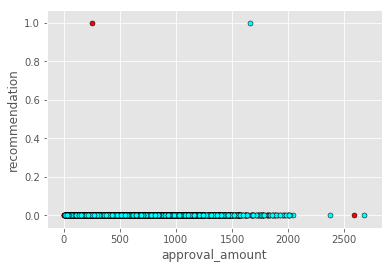

Variables: contacted approval_amount


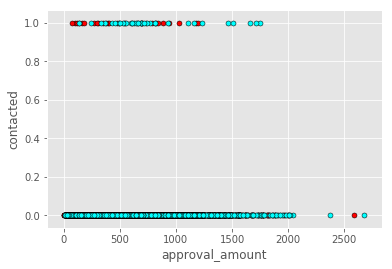

Variables: email_contacted_ts approval_amount


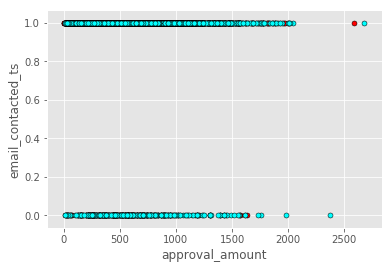

Variables: sms_contacted_ts approval_amount


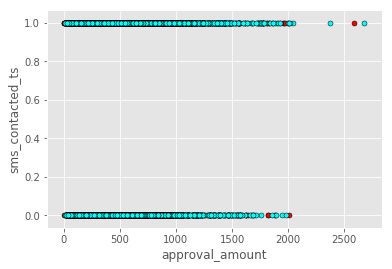

Variables: state approval_amount


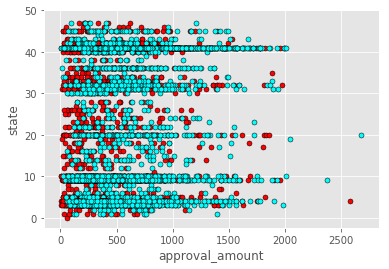

Variables: city approval_amount


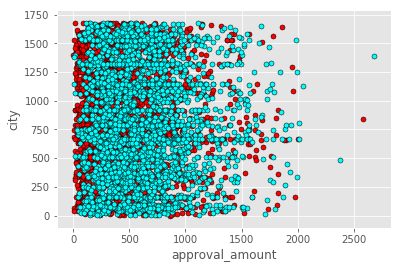

Variables: zip_code approval_amount


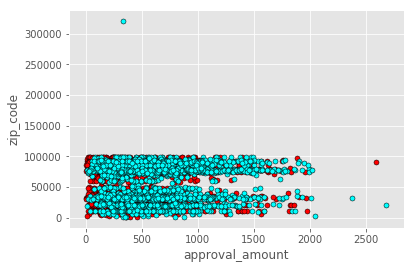

Variables: rent_or_own approval_amount


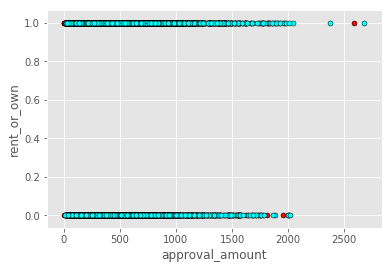

Variables: months_at_current_residence approval_amount


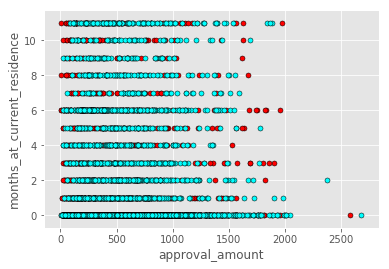

Variables: years_at_current_residence approval_amount


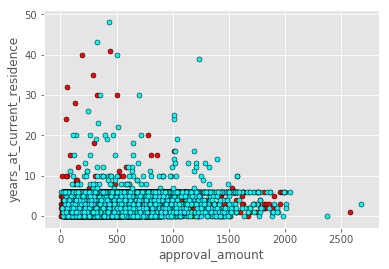

Variables: direct_deposit approval_amount


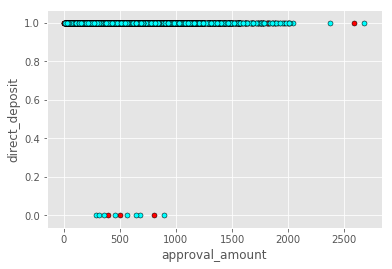

Variables: black_listed approval_amount


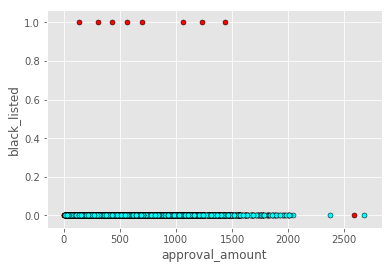

Variables: language_preference approval_amount


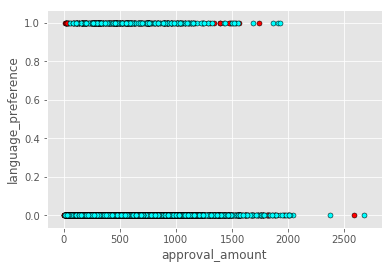

Variables: military_applicant approval_amount


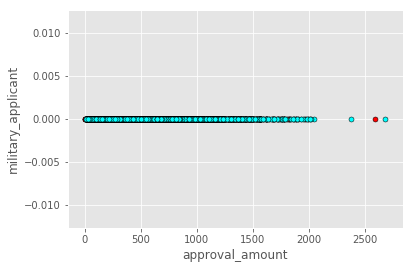

Variables: payment_frequency approval_amount


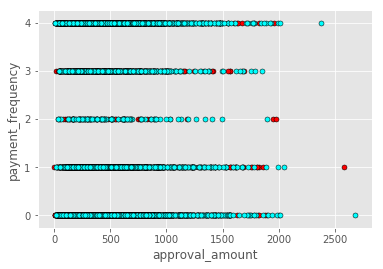

Variables: scheduled_payment_amt approval_amount


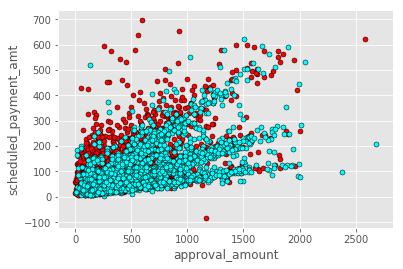

Variables: past_due_amt approval_amount


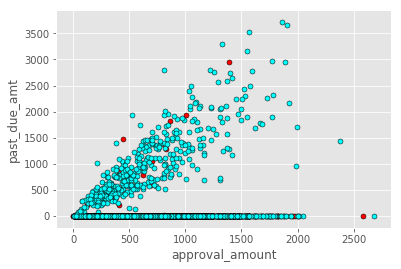

Variables: account_payment_method approval_amount


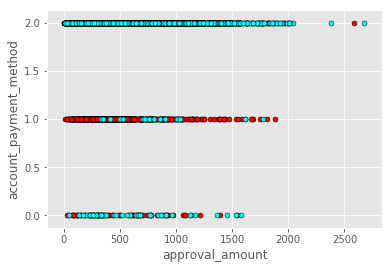

Variables: days_past_due approval_amount


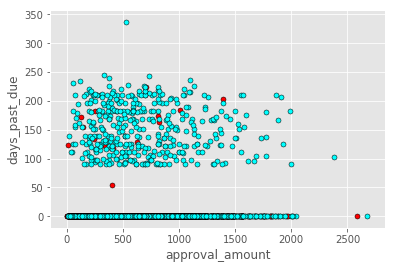

Variables: number_of_payments approval_amount


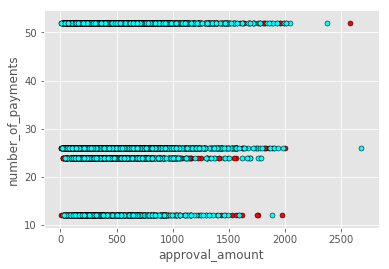

Variables: data_correction approval_amount


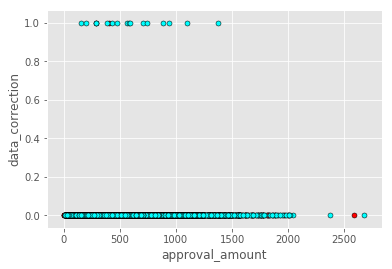

Variables: source approval_amount


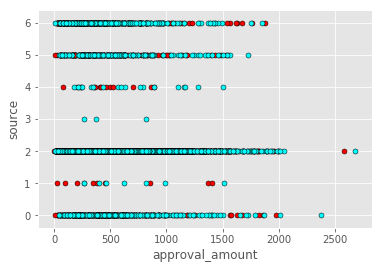

Variables: initial_decision approval_amount


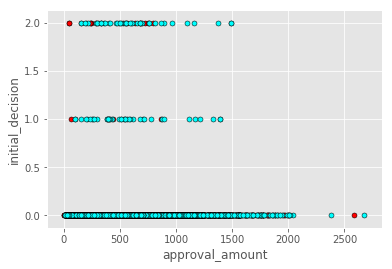

Variables: age approval_amount


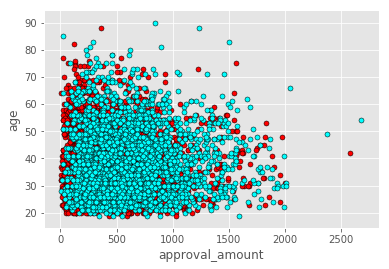

Variables: contacted recommendation


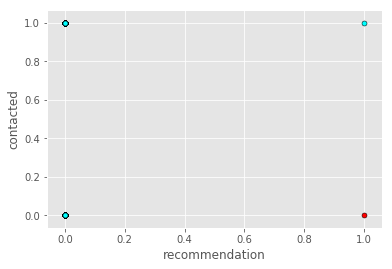

Variables: email_contacted_ts recommendation


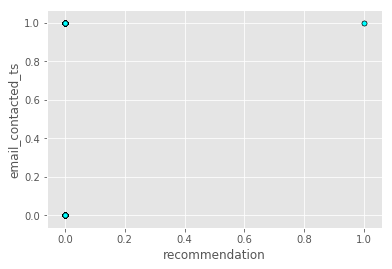

Variables: sms_contacted_ts recommendation


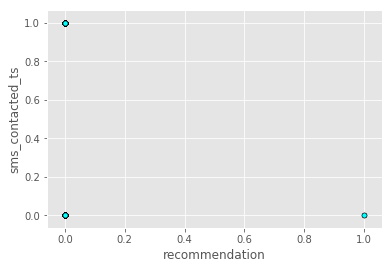

Variables: state recommendation


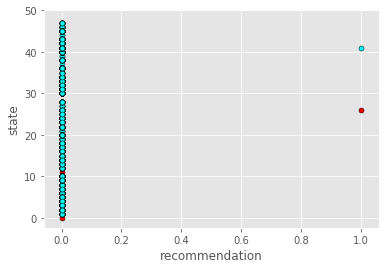

Variables: city recommendation


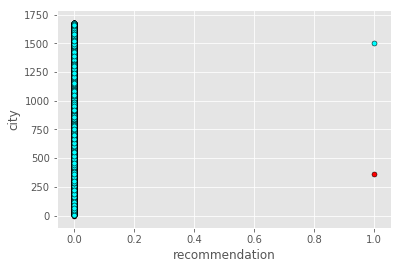

Variables: zip_code recommendation


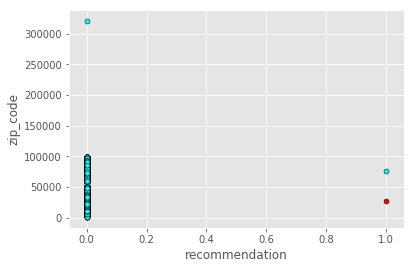

Variables: rent_or_own recommendation


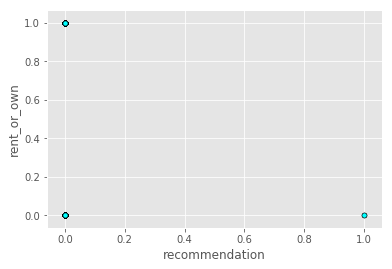

Variables: months_at_current_residence recommendation


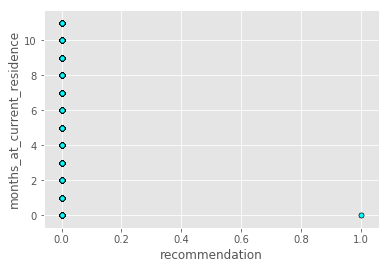

Variables: years_at_current_residence recommendation


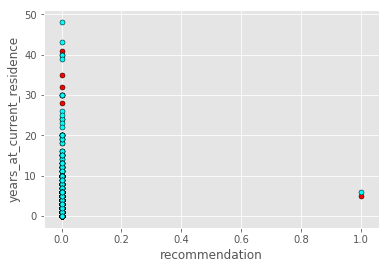

Variables: direct_deposit recommendation


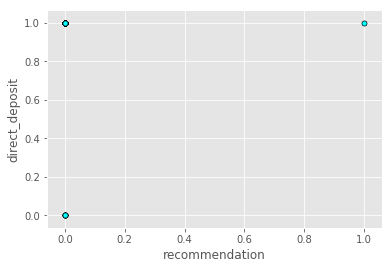

Variables: black_listed recommendation


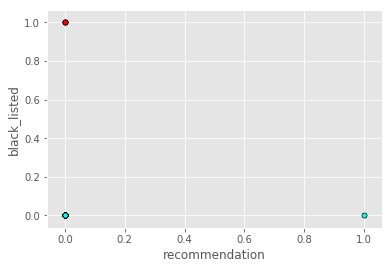

Variables: language_preference recommendation


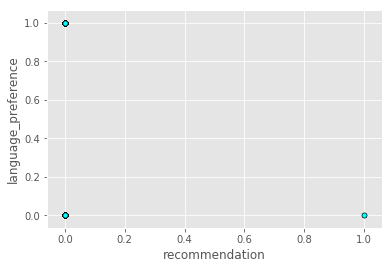

Variables: military_applicant recommendation


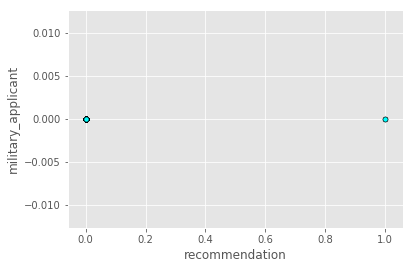

Variables: payment_frequency recommendation


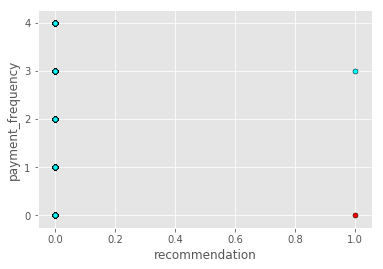

Variables: scheduled_payment_amt recommendation


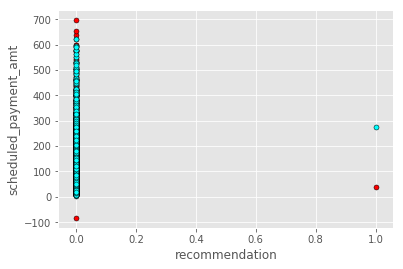

Variables: past_due_amt recommendation


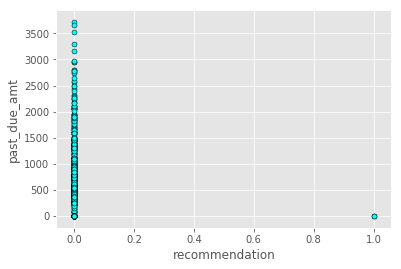

Variables: account_payment_method recommendation


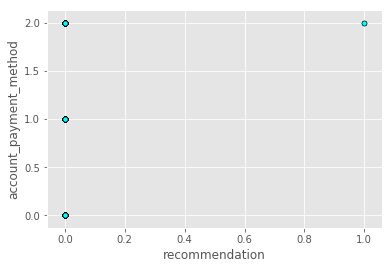

Variables: days_past_due recommendation


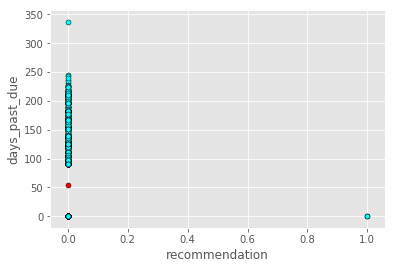

Variables: number_of_payments recommendation


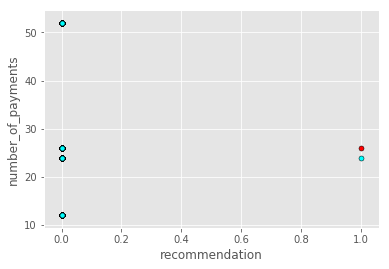

Variables: data_correction recommendation


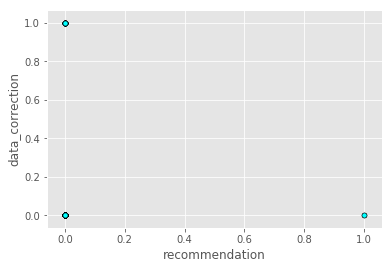

Variables: source recommendation


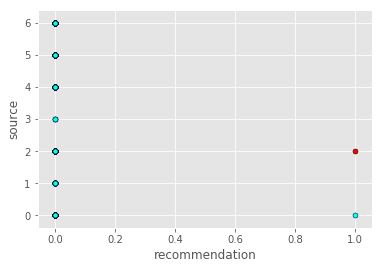

Variables: initial_decision recommendation


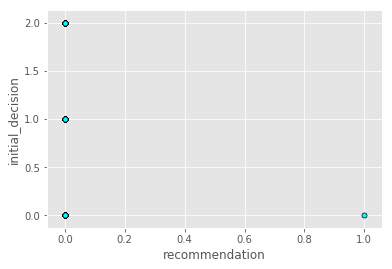

Variables: age recommendation


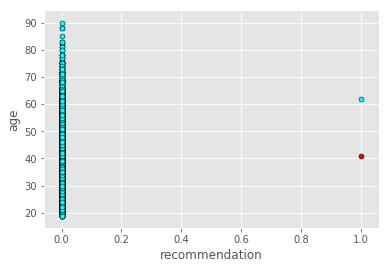

Variables: email_contacted_ts contacted


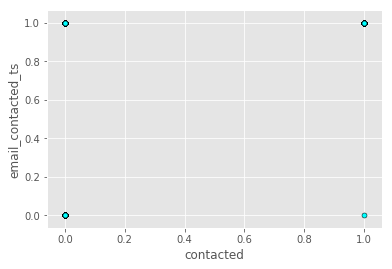

Variables: sms_contacted_ts contacted


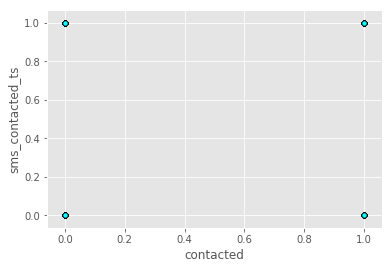

Variables: state contacted


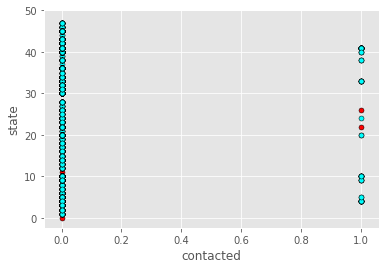

Variables: city contacted


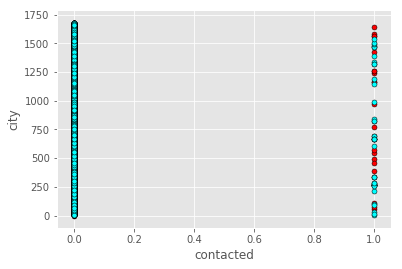

Variables: zip_code contacted


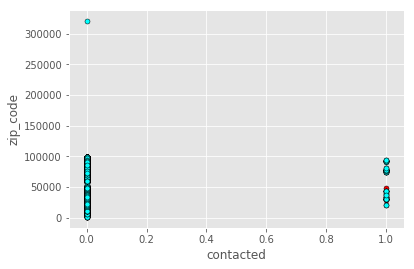

Variables: rent_or_own contacted


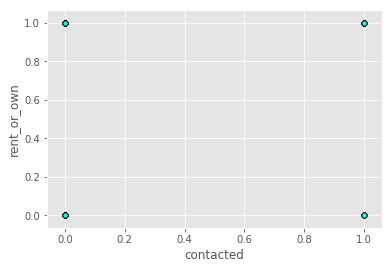

Variables: months_at_current_residence contacted


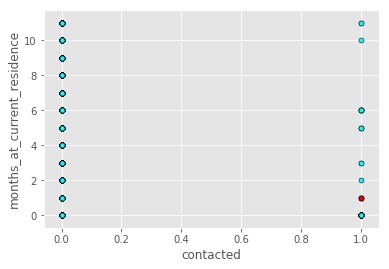

Variables: years_at_current_residence contacted


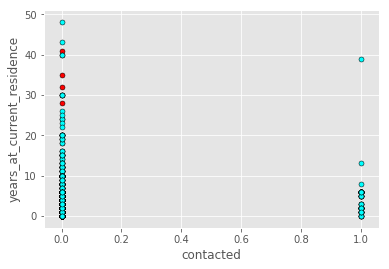

Variables: direct_deposit contacted


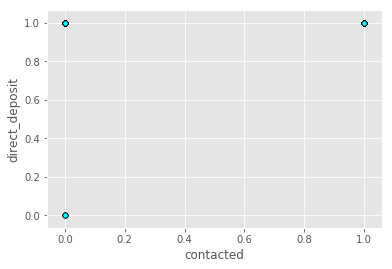

Variables: black_listed contacted


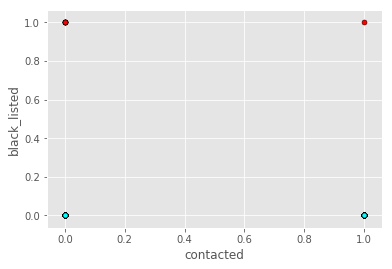

Variables: language_preference contacted


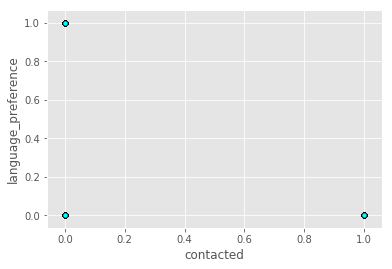

Variables: military_applicant contacted


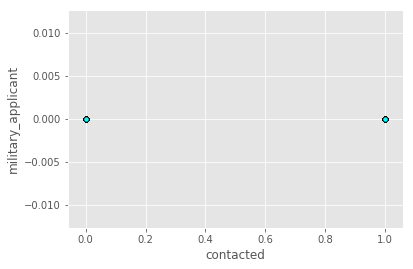

Variables: payment_frequency contacted


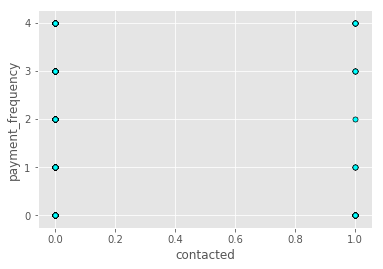

Variables: scheduled_payment_amt contacted


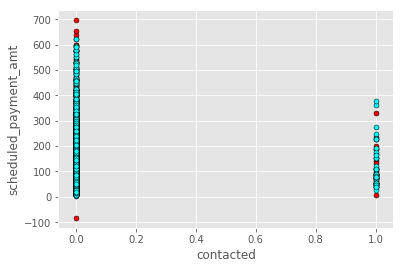

Variables: past_due_amt contacted


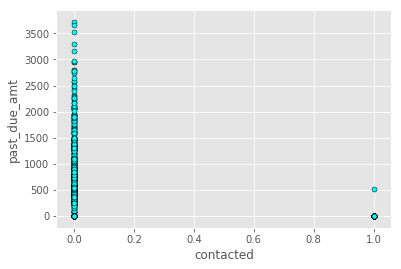

Variables: account_payment_method contacted


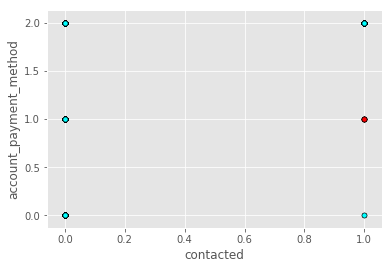

Variables: days_past_due contacted


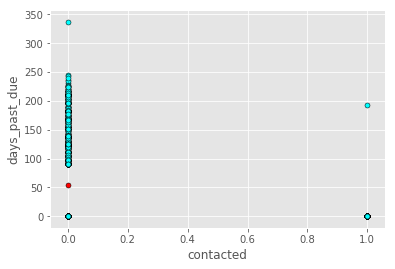

Variables: number_of_payments contacted


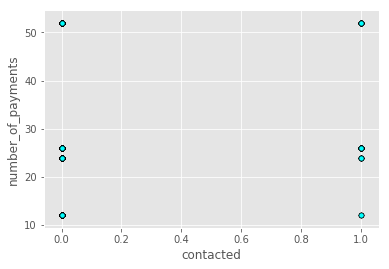

Variables: data_correction contacted


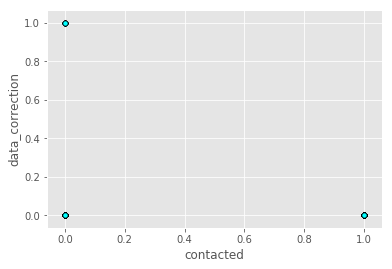

Variables: source contacted


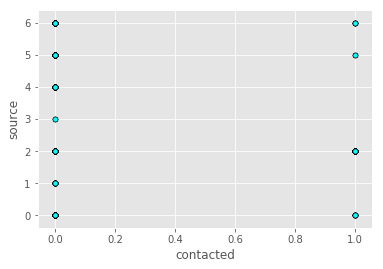

Variables: initial_decision contacted


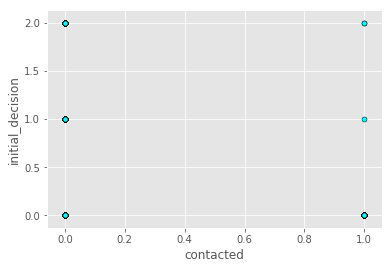

Variables: age contacted


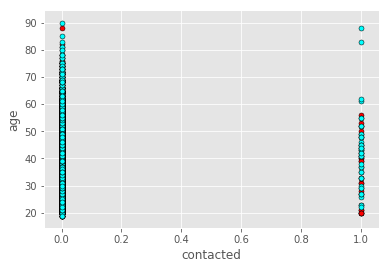

Variables: sms_contacted_ts email_contacted_ts


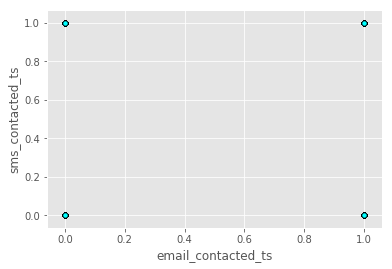

Variables: state email_contacted_ts


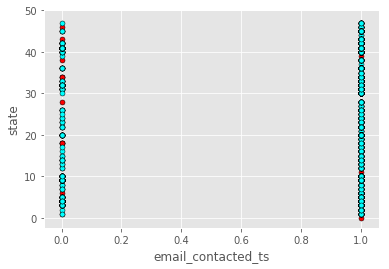

Variables: city email_contacted_ts


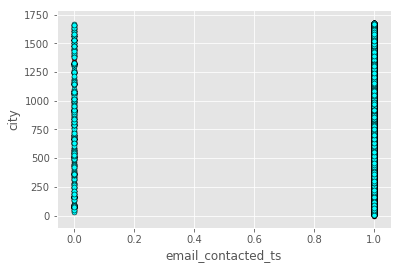

Variables: zip_code email_contacted_ts


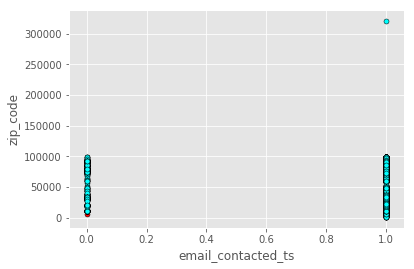

Variables: rent_or_own email_contacted_ts


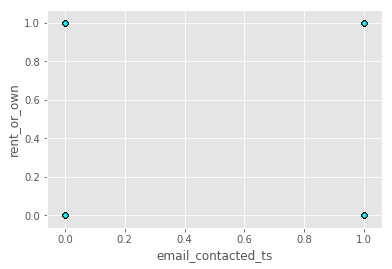

Variables: months_at_current_residence email_contacted_ts


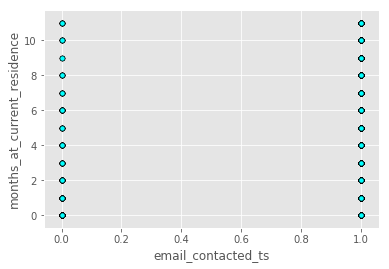

Variables: years_at_current_residence email_contacted_ts


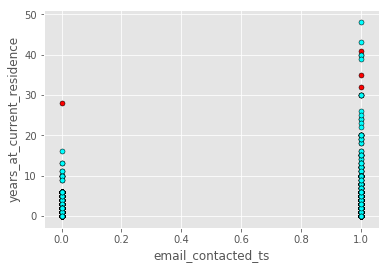

Variables: direct_deposit email_contacted_ts


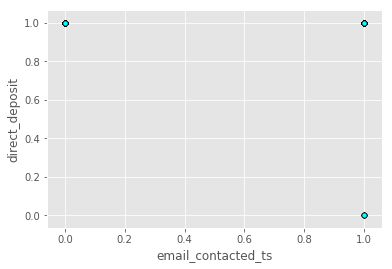

Variables: black_listed email_contacted_ts


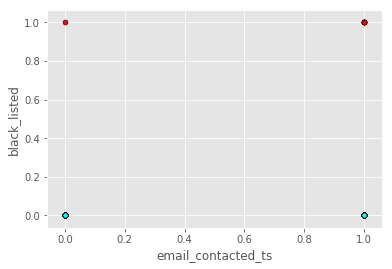

Variables: language_preference email_contacted_ts


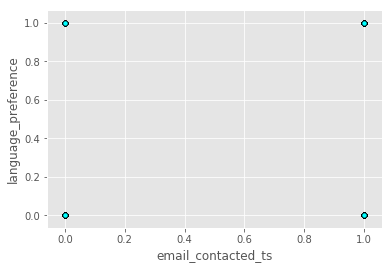

Variables: military_applicant email_contacted_ts


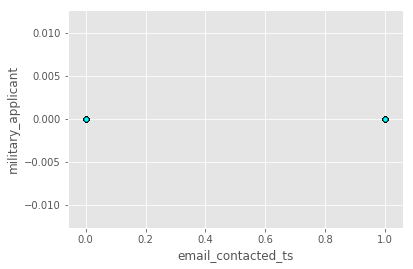

Variables: payment_frequency email_contacted_ts


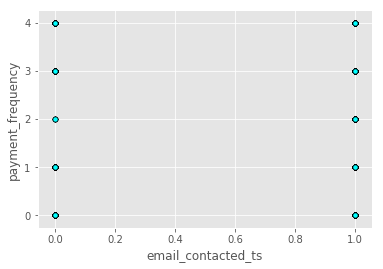

Variables: scheduled_payment_amt email_contacted_ts


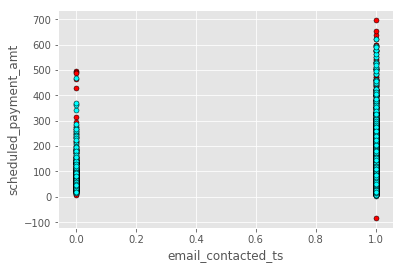

Variables: past_due_amt email_contacted_ts


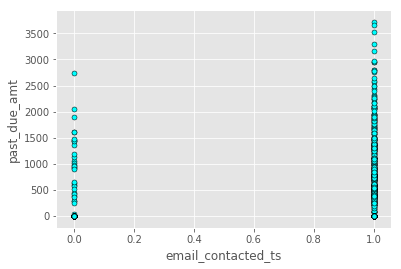

Variables: account_payment_method email_contacted_ts


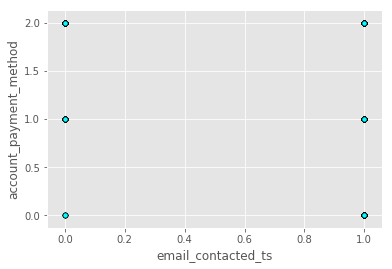

Variables: days_past_due email_contacted_ts


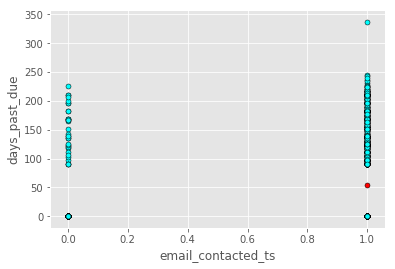

Variables: number_of_payments email_contacted_ts


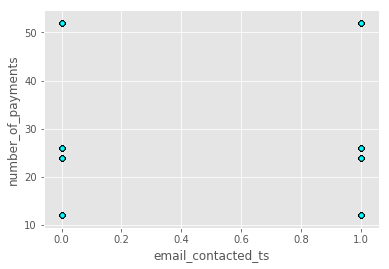

Variables: data_correction email_contacted_ts


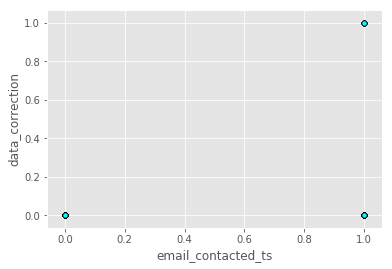

Variables: source email_contacted_ts


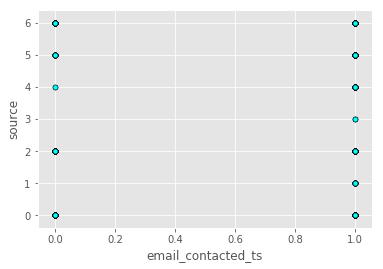

Variables: initial_decision email_contacted_ts


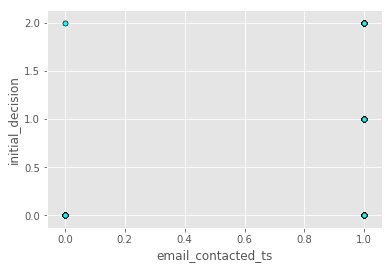

Variables: age email_contacted_ts


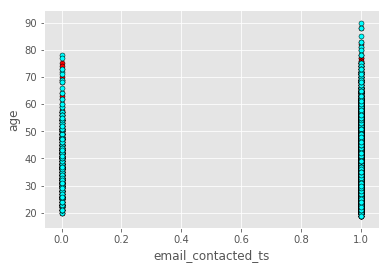

Variables: state sms_contacted_ts


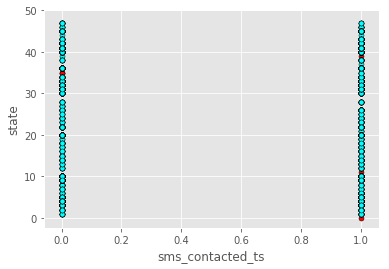

Variables: city sms_contacted_ts


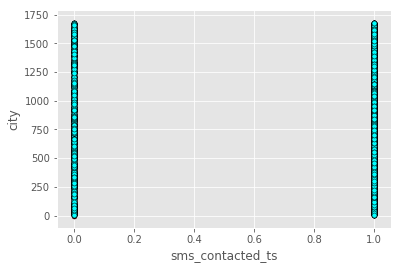

Variables: zip_code sms_contacted_ts


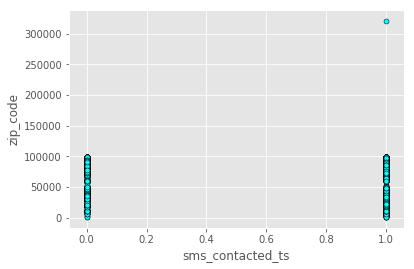

Variables: rent_or_own sms_contacted_ts


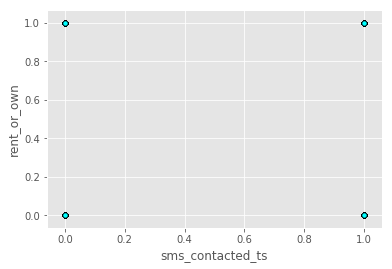

Variables: months_at_current_residence sms_contacted_ts


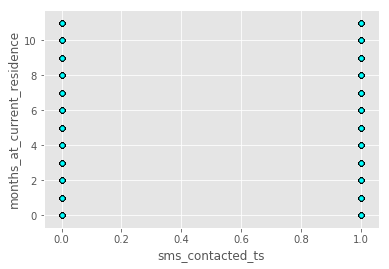

Variables: years_at_current_residence sms_contacted_ts


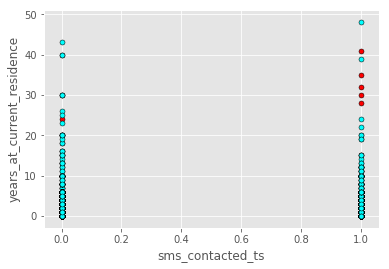

Variables: direct_deposit sms_contacted_ts


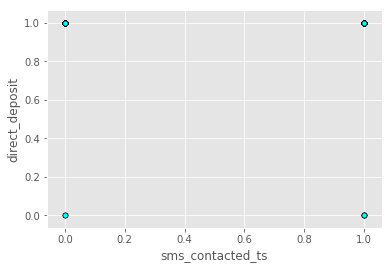

Variables: black_listed sms_contacted_ts


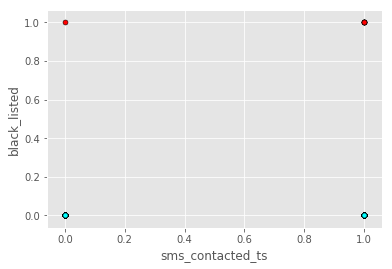

Variables: language_preference sms_contacted_ts


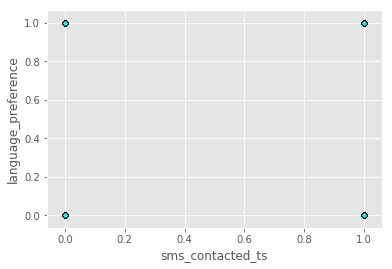

Variables: military_applicant sms_contacted_ts


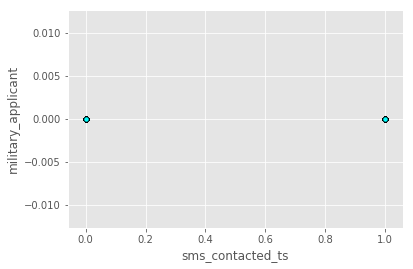

Variables: payment_frequency sms_contacted_ts


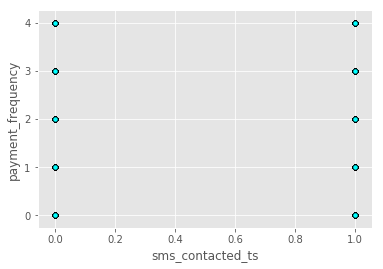

Variables: scheduled_payment_amt sms_contacted_ts


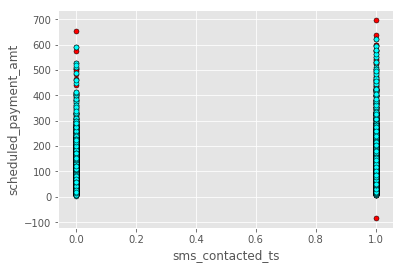

Variables: past_due_amt sms_contacted_ts


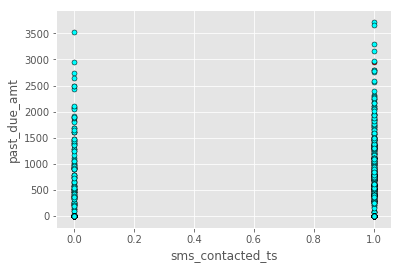

Variables: account_payment_method sms_contacted_ts


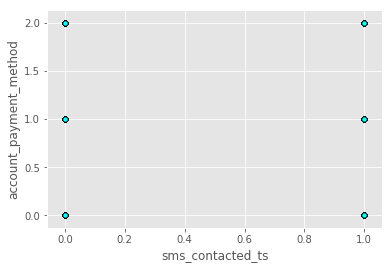

Variables: days_past_due sms_contacted_ts


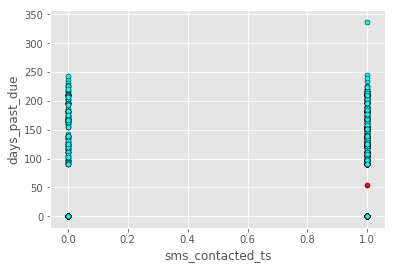

Variables: number_of_payments sms_contacted_ts


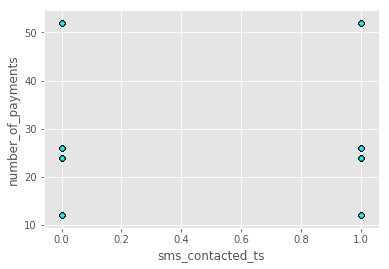

Variables: data_correction sms_contacted_ts


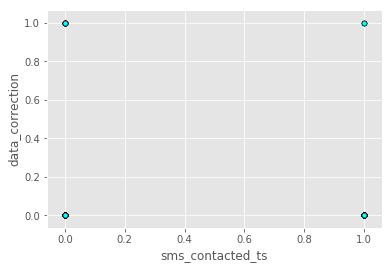

Variables: source sms_contacted_ts


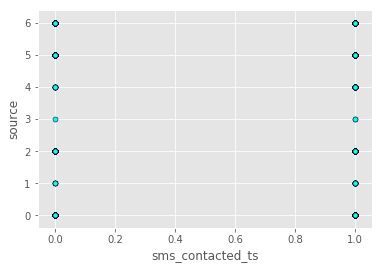

Variables: initial_decision sms_contacted_ts


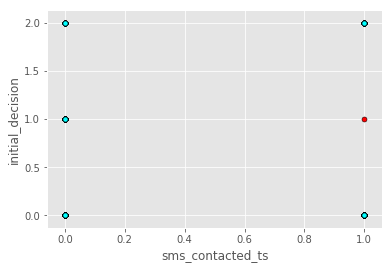

Variables: age sms_contacted_ts


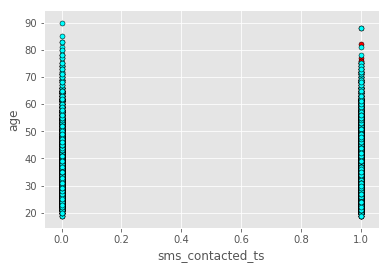

Variables: city state


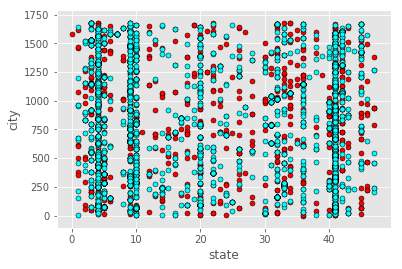

Variables: zip_code state


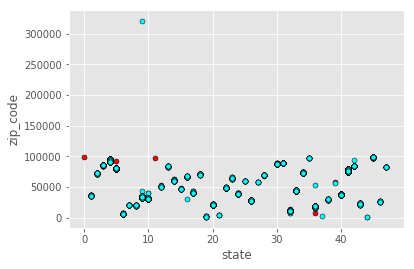

Variables: rent_or_own state


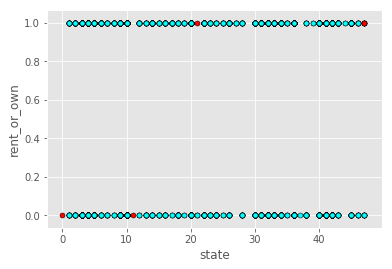

Variables: months_at_current_residence state


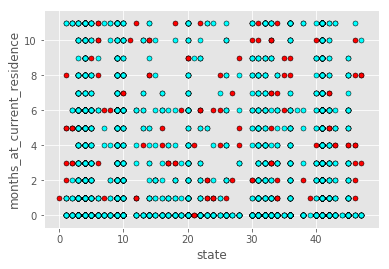

Variables: years_at_current_residence state


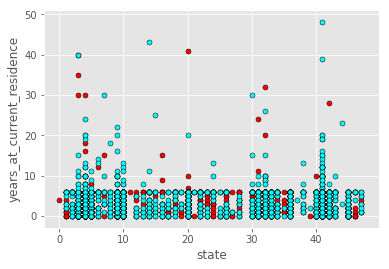

Variables: direct_deposit state


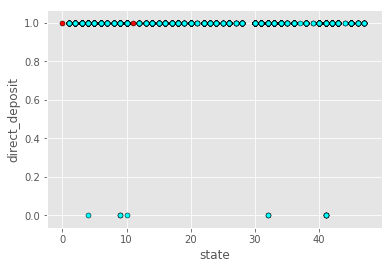

Variables: black_listed state


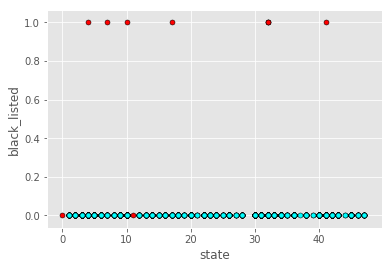

Variables: language_preference state


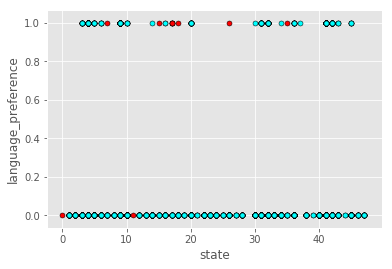

Variables: military_applicant state


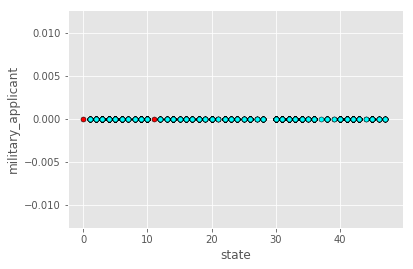

Variables: payment_frequency state


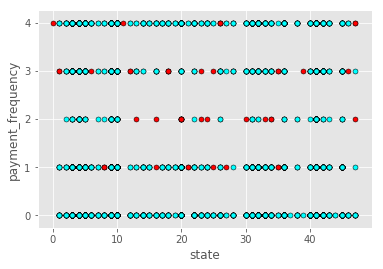

Variables: scheduled_payment_amt state


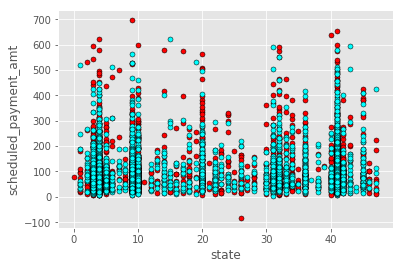

Variables: past_due_amt state


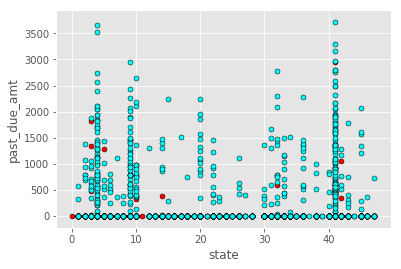

Variables: account_payment_method state


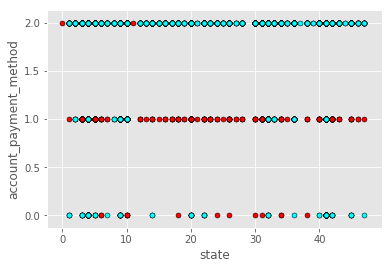

Variables: days_past_due state


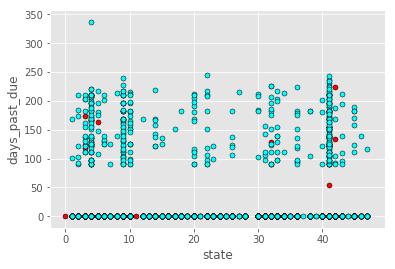

Variables: number_of_payments state


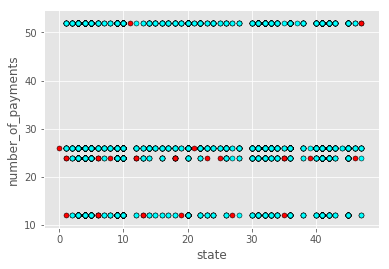

Variables: data_correction state


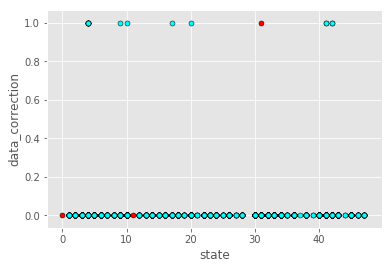

Variables: source state


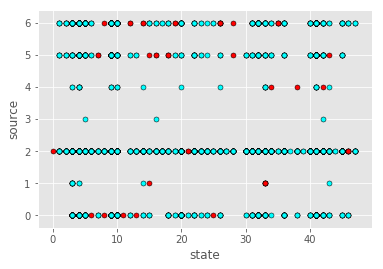

Variables: initial_decision state


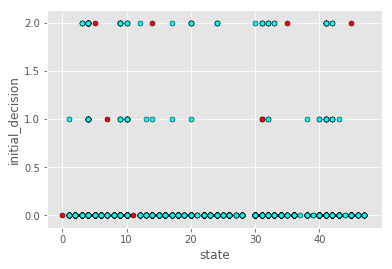

Variables: age state


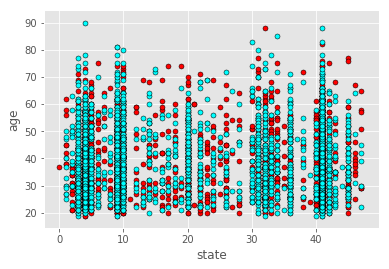

Variables: zip_code city


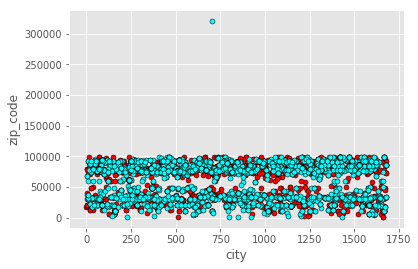

Variables: rent_or_own city


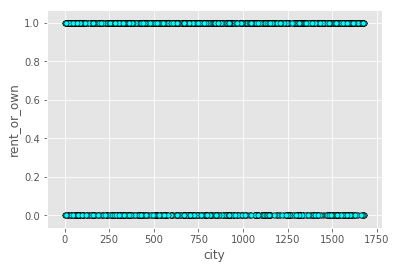

Variables: months_at_current_residence city


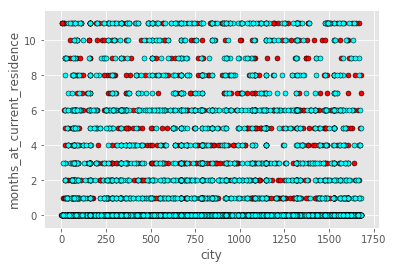

Variables: years_at_current_residence city


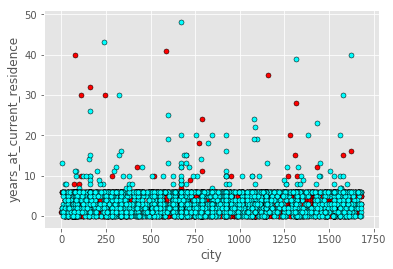

Variables: direct_deposit city


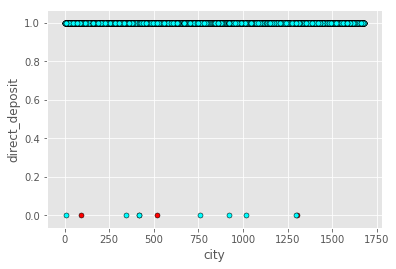

Variables: black_listed city


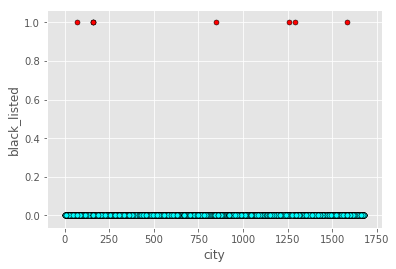

Variables: language_preference city


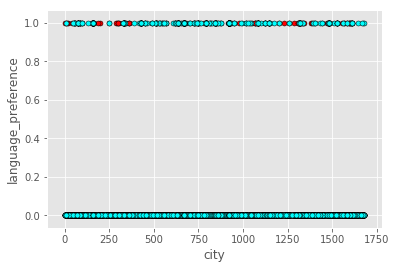

Variables: military_applicant city


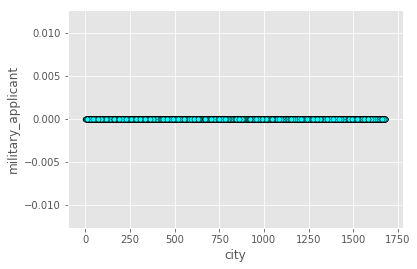

Variables: payment_frequency city


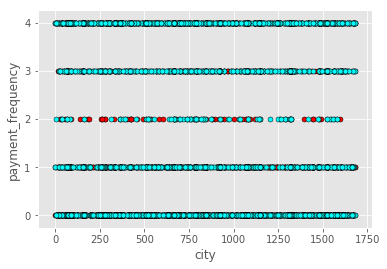

Variables: scheduled_payment_amt city


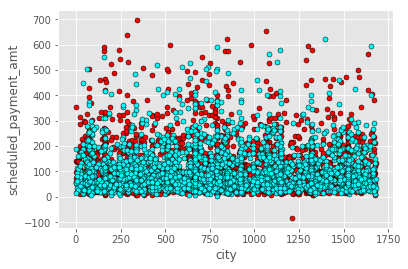

Variables: past_due_amt city


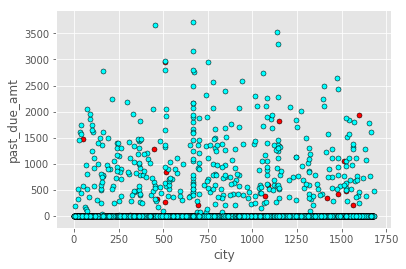

Variables: account_payment_method city


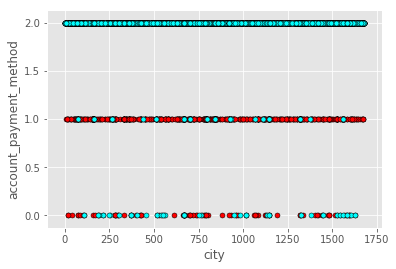

Variables: days_past_due city


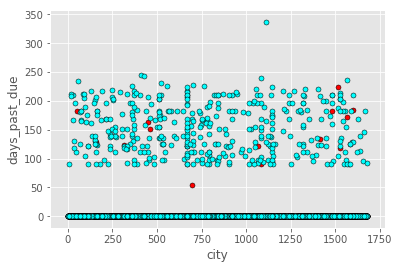

Variables: number_of_payments city


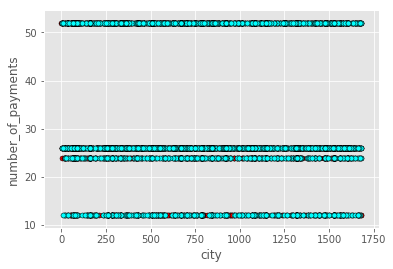

Variables: data_correction city


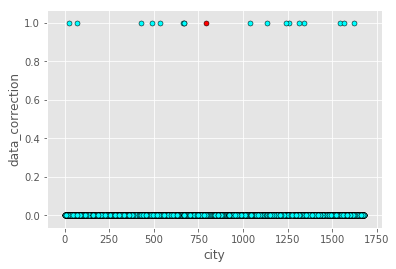

Variables: source city


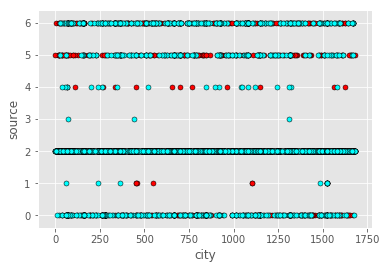

Variables: initial_decision city


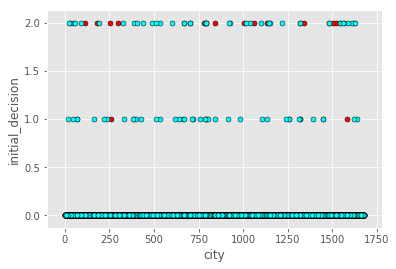

Variables: age city


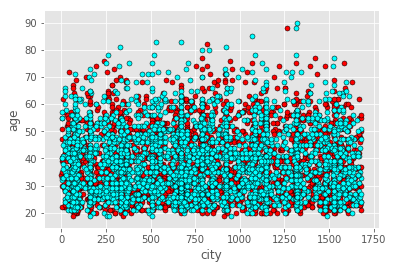

Variables: rent_or_own zip_code


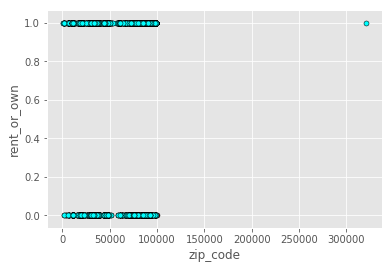

Variables: months_at_current_residence zip_code


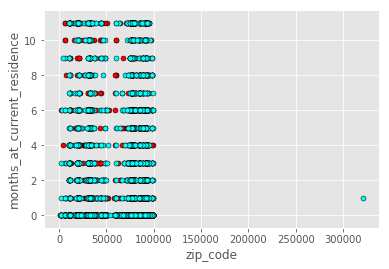

Variables: years_at_current_residence zip_code


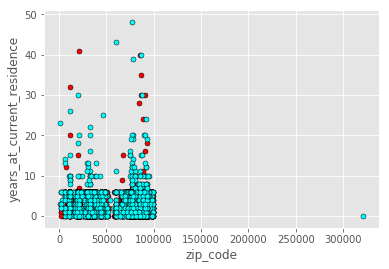

Variables: direct_deposit zip_code


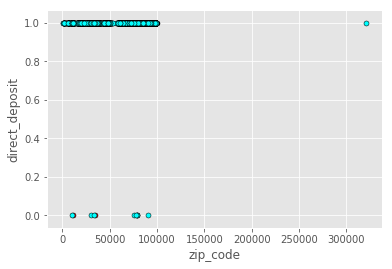

Variables: black_listed zip_code


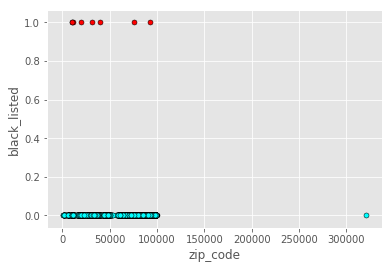

Variables: language_preference zip_code


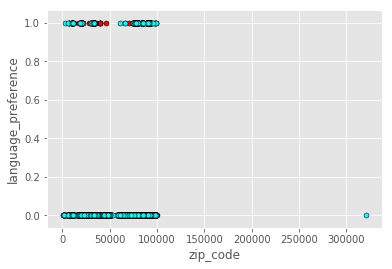

Variables: military_applicant zip_code


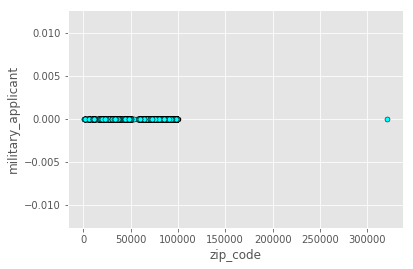

Variables: payment_frequency zip_code


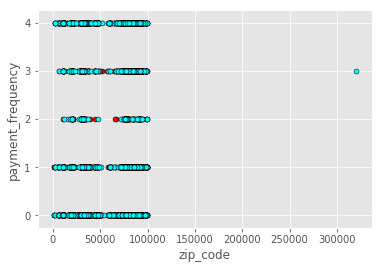

Variables: scheduled_payment_amt zip_code


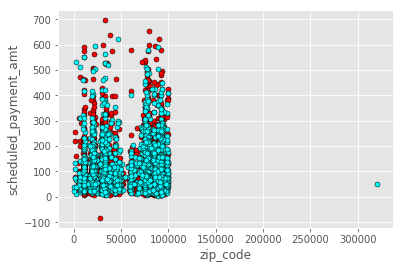

Variables: past_due_amt zip_code


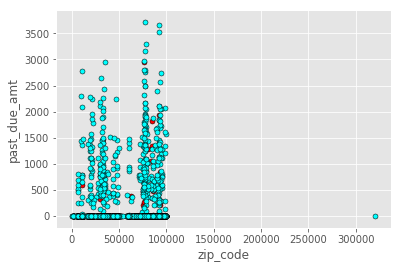

Variables: account_payment_method zip_code


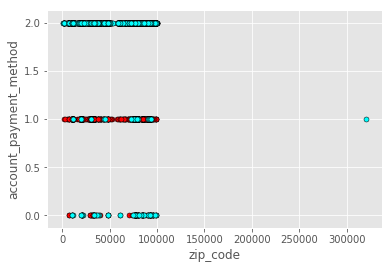

Variables: days_past_due zip_code


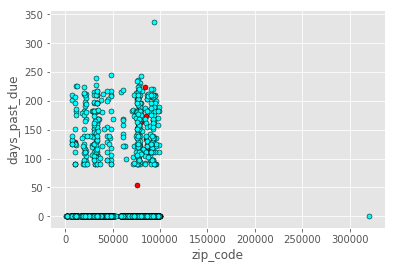

Variables: number_of_payments zip_code


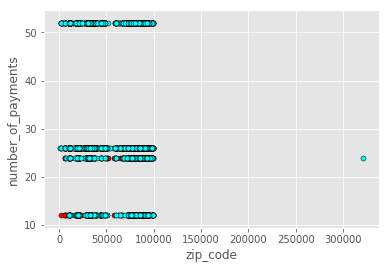

Variables: data_correction zip_code


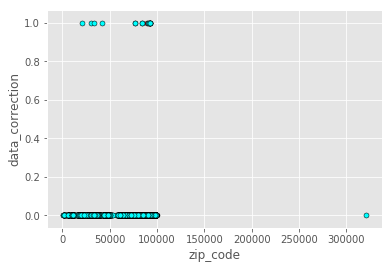

Variables: source zip_code


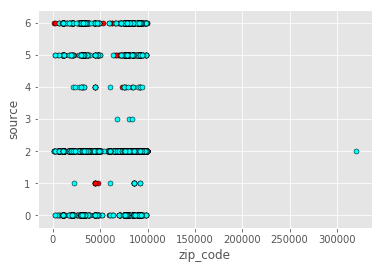

Variables: initial_decision zip_code


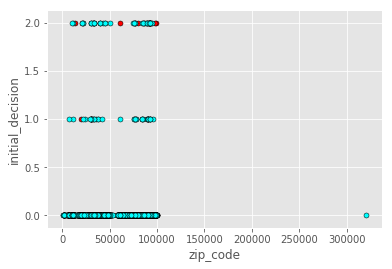

Variables: age zip_code


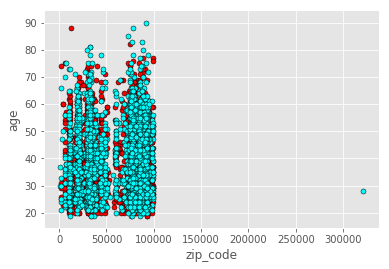

Variables: months_at_current_residence rent_or_own


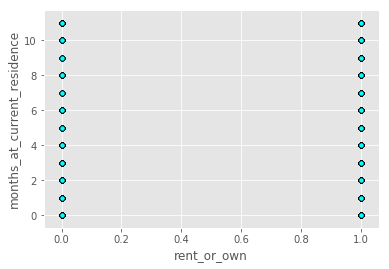

Variables: years_at_current_residence rent_or_own


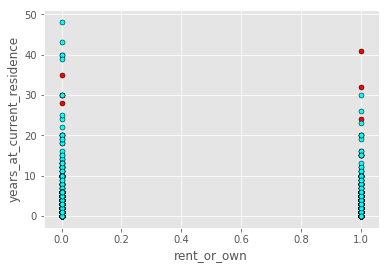

Variables: direct_deposit rent_or_own


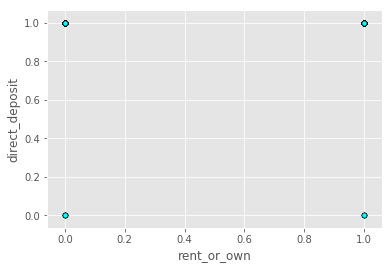

Variables: black_listed rent_or_own


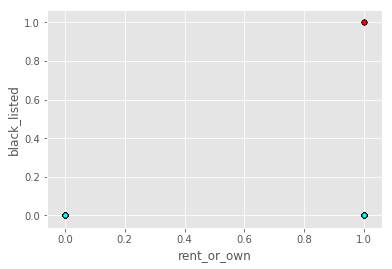

Variables: language_preference rent_or_own


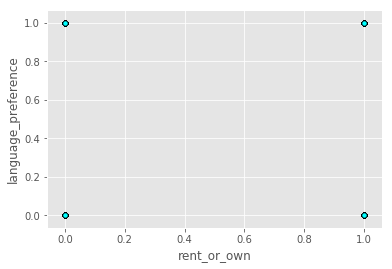

Variables: military_applicant rent_or_own


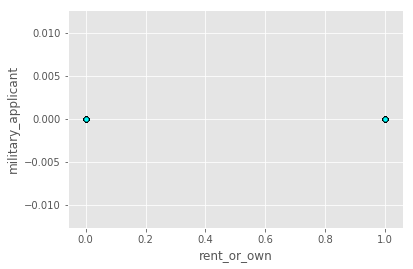

Variables: payment_frequency rent_or_own


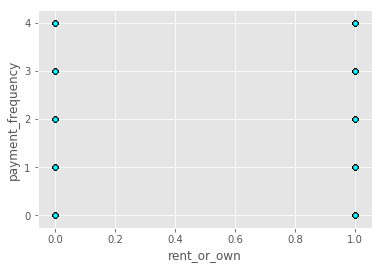

Variables: scheduled_payment_amt rent_or_own


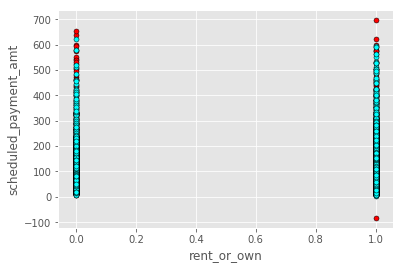

Variables: past_due_amt rent_or_own


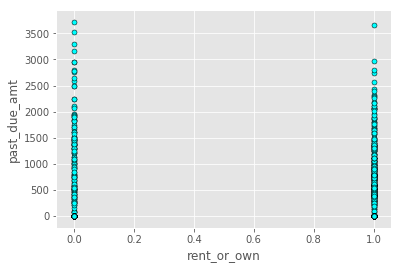

Variables: account_payment_method rent_or_own


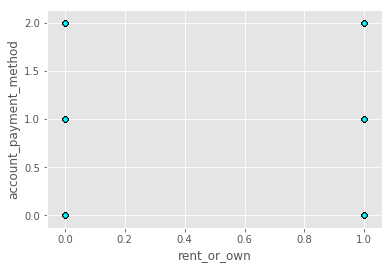

Variables: days_past_due rent_or_own


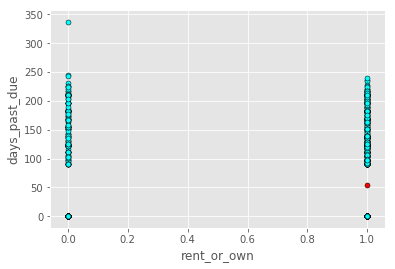

Variables: number_of_payments rent_or_own


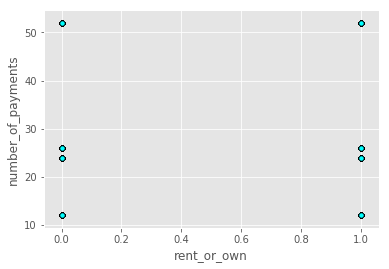

Variables: data_correction rent_or_own


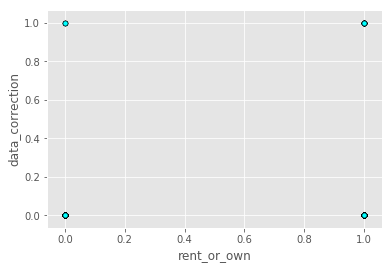

Variables: source rent_or_own


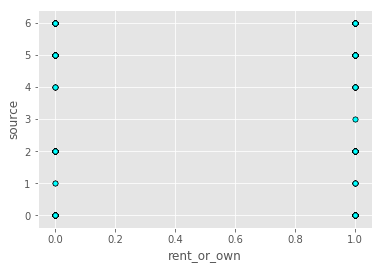

Variables: initial_decision rent_or_own


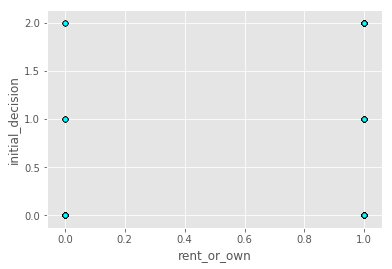

Variables: age rent_or_own


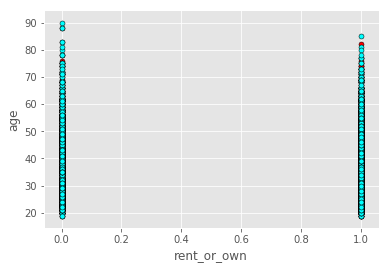

Variables: years_at_current_residence months_at_current_residence


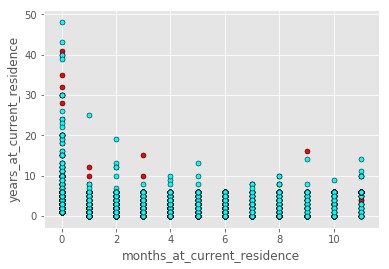

Variables: direct_deposit months_at_current_residence


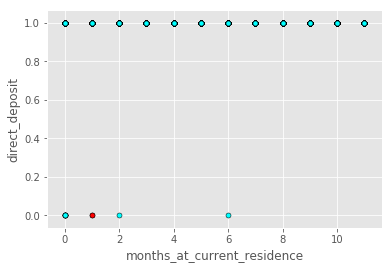

Variables: black_listed months_at_current_residence


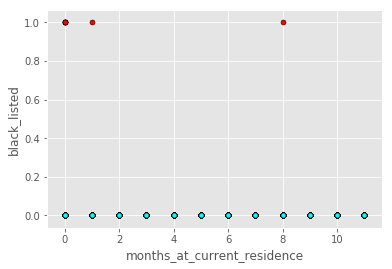

Variables: language_preference months_at_current_residence


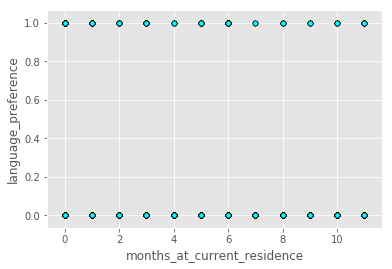

Variables: military_applicant months_at_current_residence


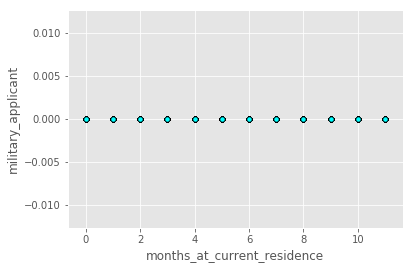

Variables: payment_frequency months_at_current_residence


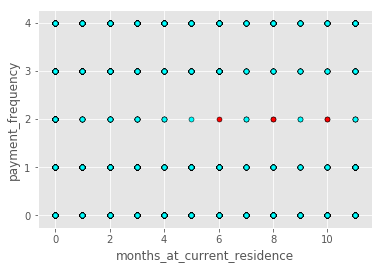

Variables: scheduled_payment_amt months_at_current_residence


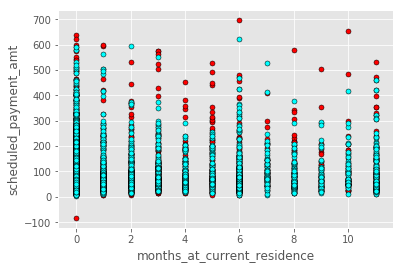

Variables: past_due_amt months_at_current_residence


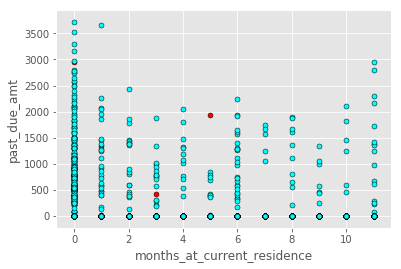

Variables: account_payment_method months_at_current_residence


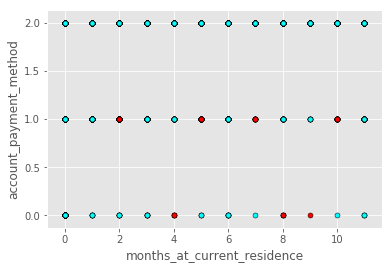

Variables: days_past_due months_at_current_residence


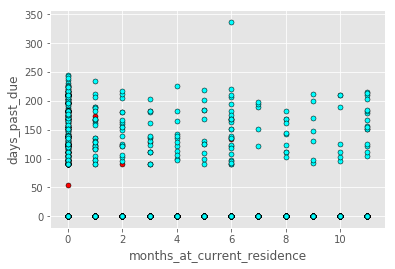

Variables: number_of_payments months_at_current_residence


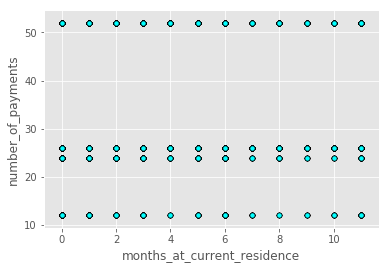

Variables: data_correction months_at_current_residence


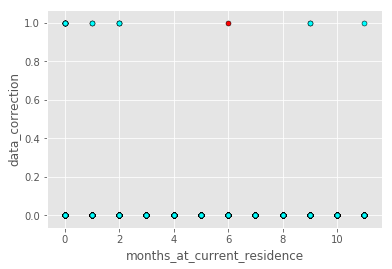

Variables: source months_at_current_residence


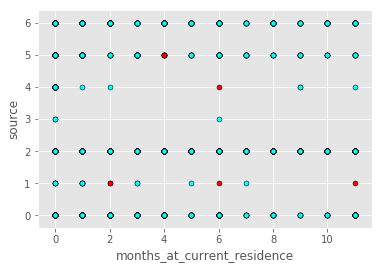

Variables: initial_decision months_at_current_residence


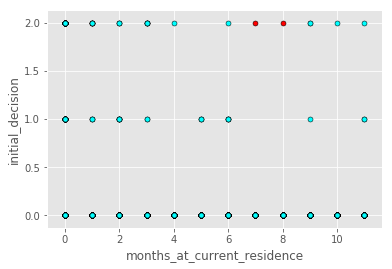

Variables: age months_at_current_residence


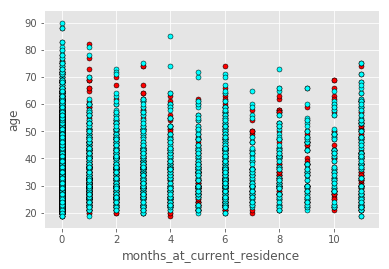

Variables: direct_deposit years_at_current_residence


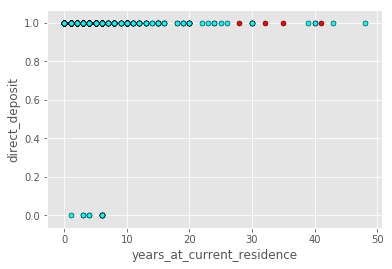

Variables: black_listed years_at_current_residence


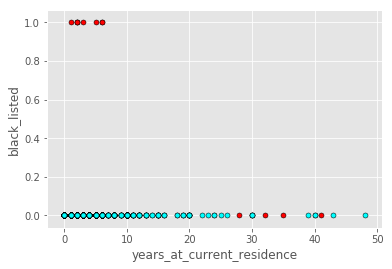

Variables: language_preference years_at_current_residence


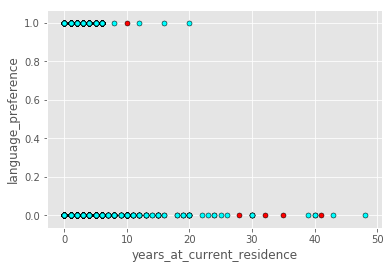

Variables: military_applicant years_at_current_residence


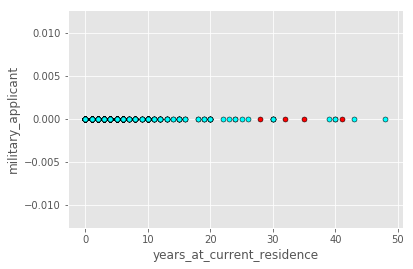

Variables: payment_frequency years_at_current_residence


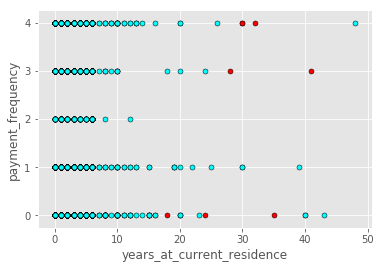

Variables: scheduled_payment_amt years_at_current_residence


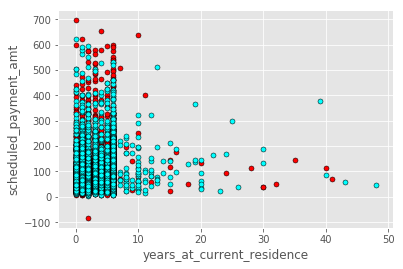

Variables: past_due_amt years_at_current_residence


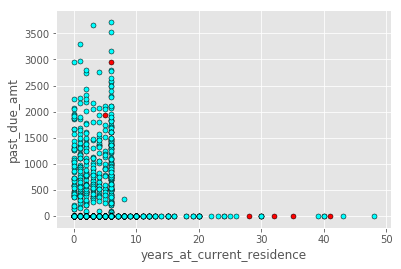

Variables: account_payment_method years_at_current_residence


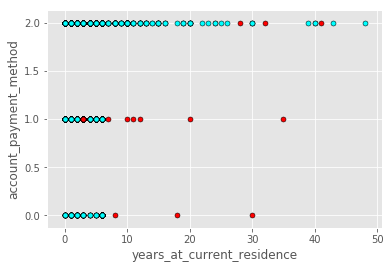

Variables: days_past_due years_at_current_residence


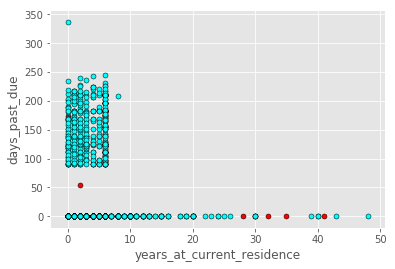

Variables: number_of_payments years_at_current_residence


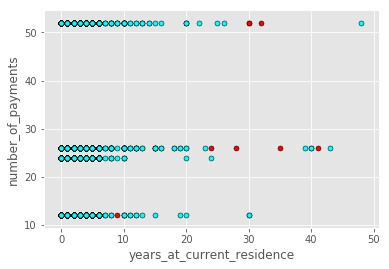

Variables: data_correction years_at_current_residence


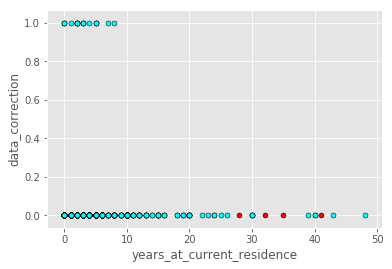

Variables: source years_at_current_residence


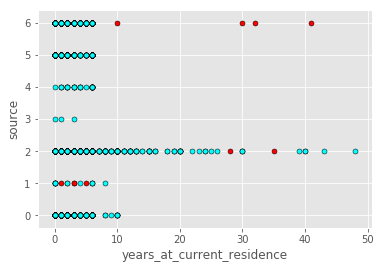

Variables: initial_decision years_at_current_residence


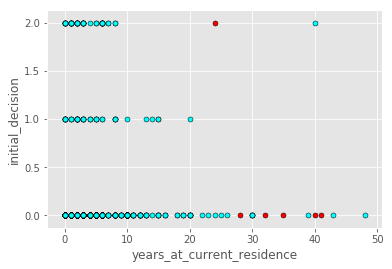

Variables: age years_at_current_residence


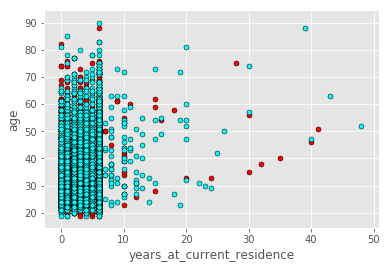

Variables: black_listed direct_deposit


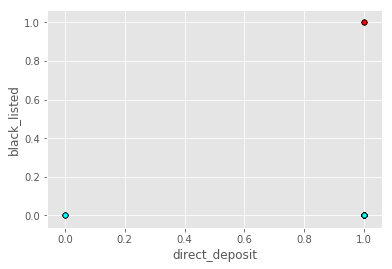

Variables: language_preference direct_deposit


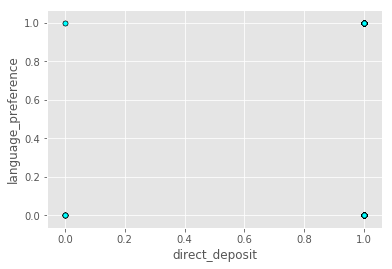

Variables: military_applicant direct_deposit


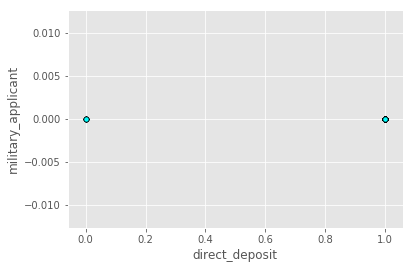

Variables: payment_frequency direct_deposit


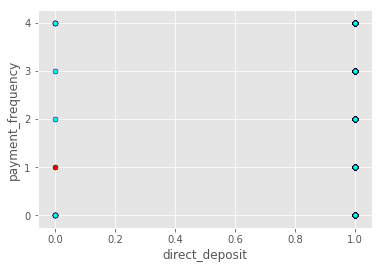

Variables: scheduled_payment_amt direct_deposit


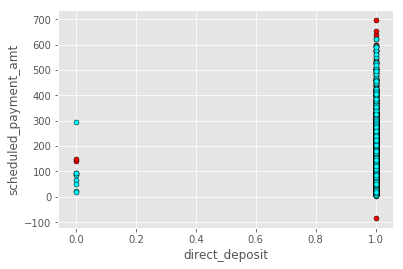

Variables: past_due_amt direct_deposit


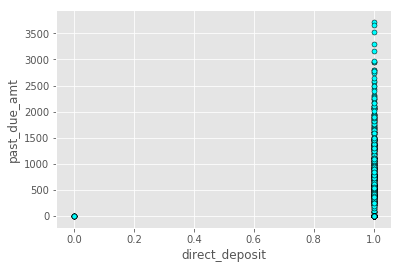

Variables: account_payment_method direct_deposit


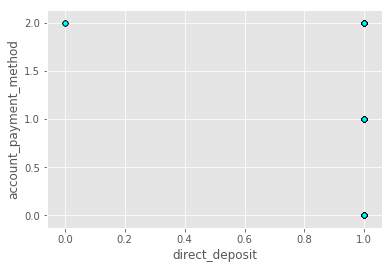

Variables: days_past_due direct_deposit


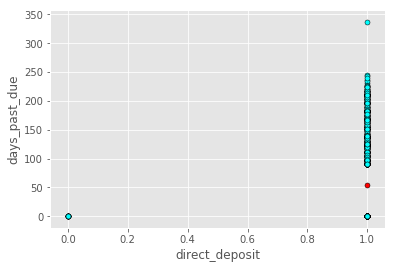

Variables: number_of_payments direct_deposit


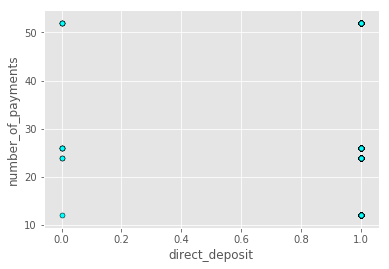

Variables: data_correction direct_deposit


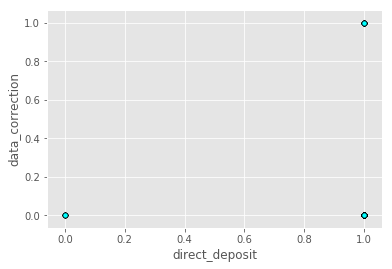

Variables: source direct_deposit


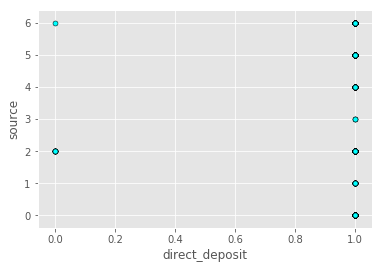

Variables: initial_decision direct_deposit


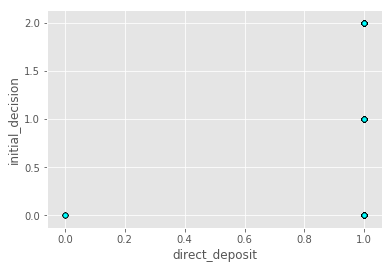

Variables: age direct_deposit


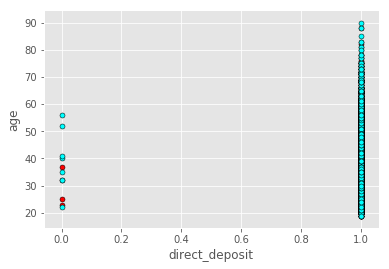

Variables: language_preference black_listed


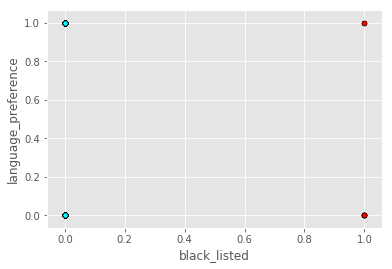

Variables: military_applicant black_listed


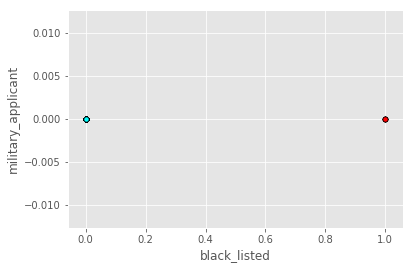

Variables: payment_frequency black_listed


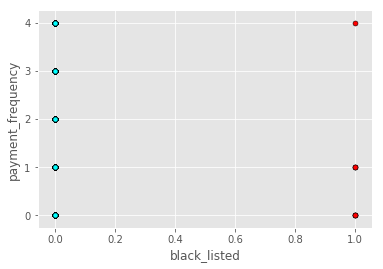

Variables: scheduled_payment_amt black_listed


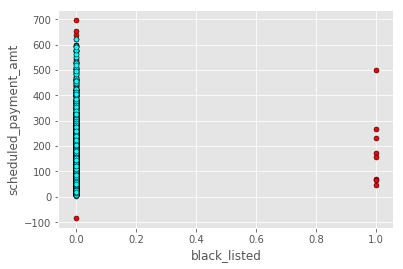

Variables: past_due_amt black_listed


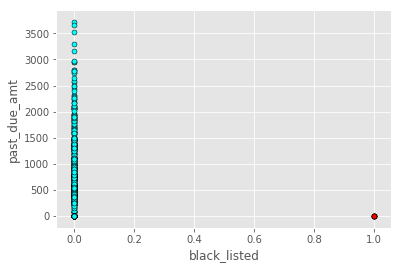

Variables: account_payment_method black_listed


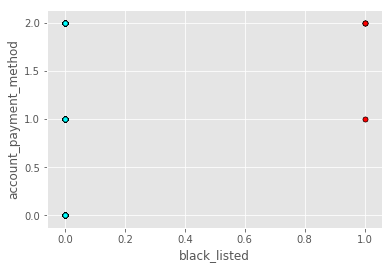

Variables: days_past_due black_listed


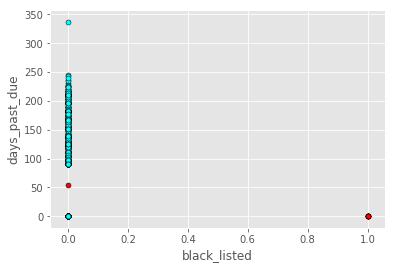

Variables: number_of_payments black_listed


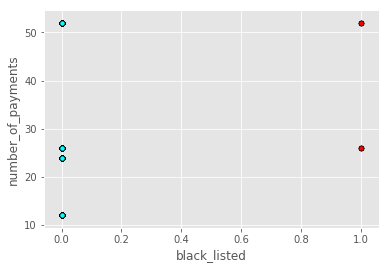

Variables: data_correction black_listed


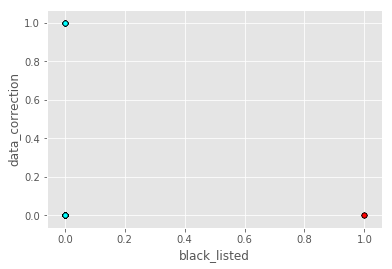

Variables: source black_listed


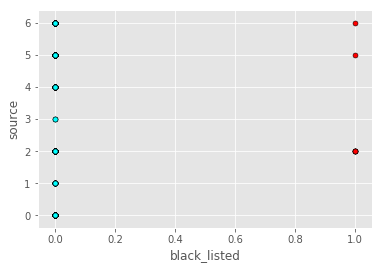

Variables: initial_decision black_listed


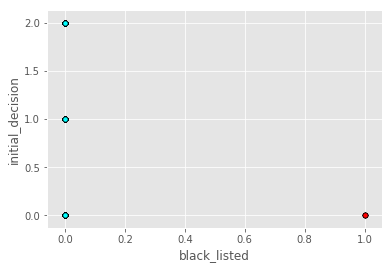

Variables: age black_listed


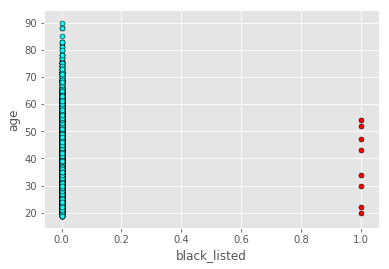

Variables: military_applicant language_preference


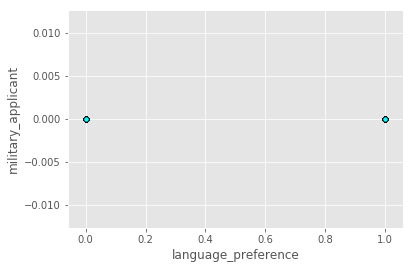

Variables: payment_frequency language_preference


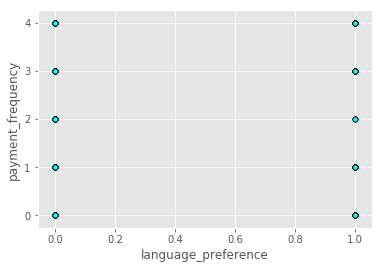

Variables: scheduled_payment_amt language_preference


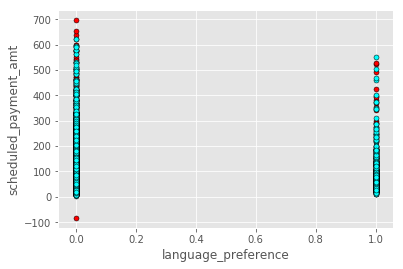

Variables: past_due_amt language_preference


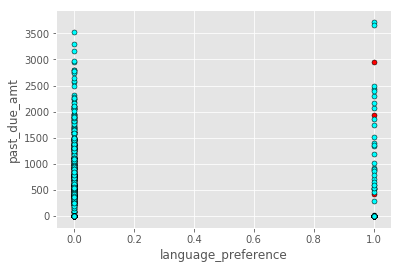

Variables: account_payment_method language_preference


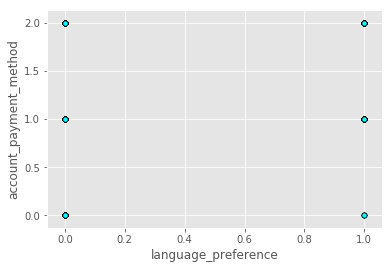

Variables: days_past_due language_preference


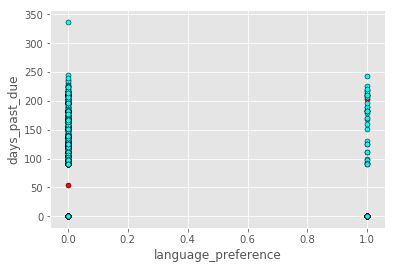

Variables: number_of_payments language_preference


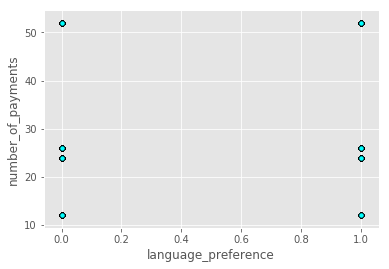

Variables: data_correction language_preference


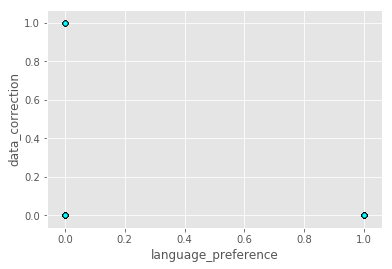

Variables: source language_preference


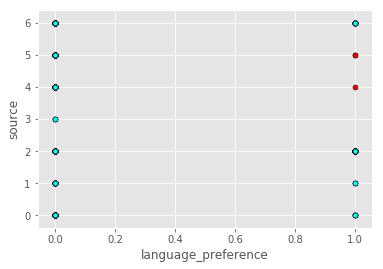

Variables: initial_decision language_preference


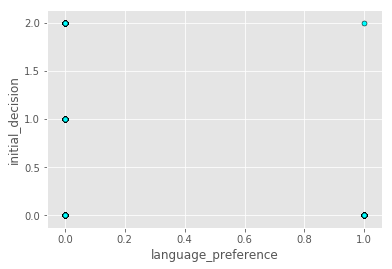

Variables: age language_preference


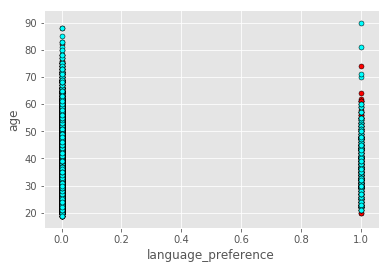

Variables: payment_frequency military_applicant


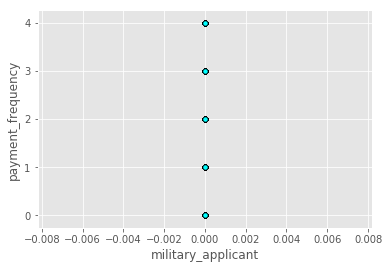

Variables: scheduled_payment_amt military_applicant


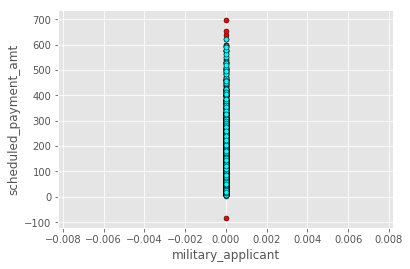

Variables: past_due_amt military_applicant


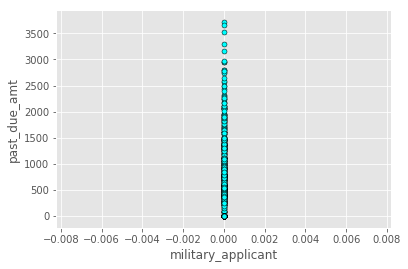

Variables: account_payment_method military_applicant


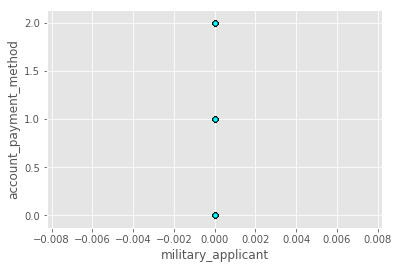

Variables: days_past_due military_applicant


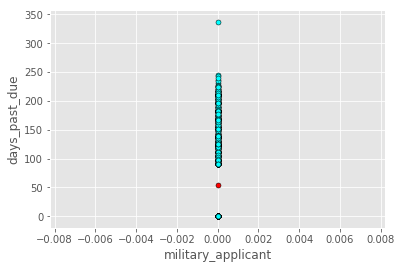

Variables: number_of_payments military_applicant


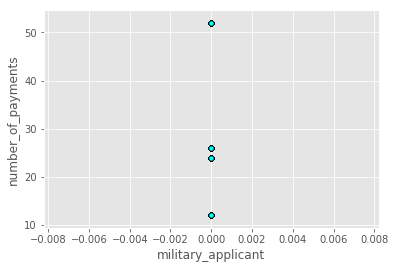

Variables: data_correction military_applicant


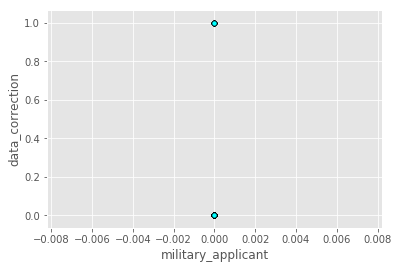

Variables: source military_applicant


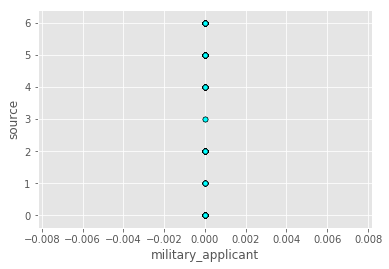

Variables: initial_decision military_applicant


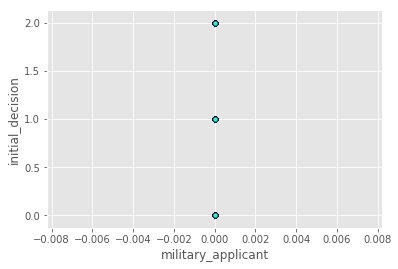

Variables: age military_applicant


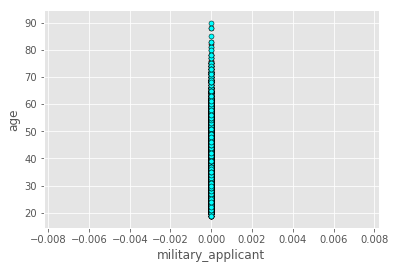

Variables: scheduled_payment_amt payment_frequency


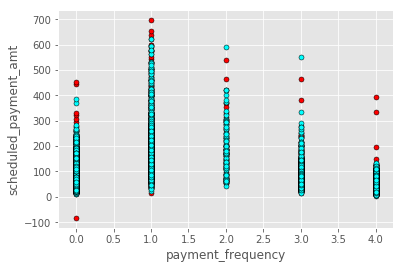

Variables: past_due_amt payment_frequency


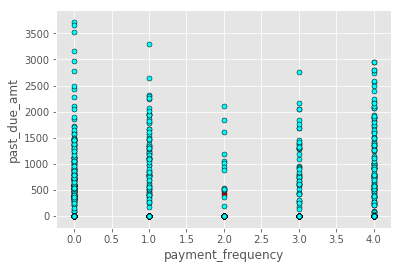

Variables: account_payment_method payment_frequency


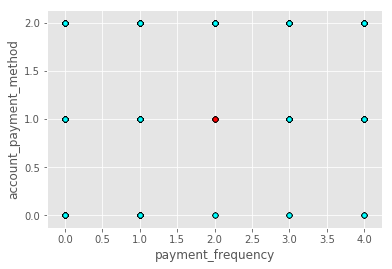

Variables: days_past_due payment_frequency


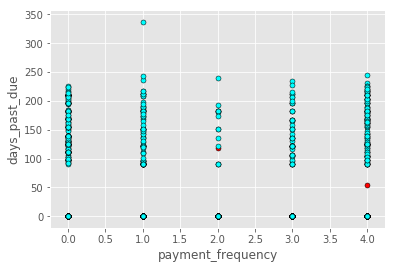

Variables: number_of_payments payment_frequency


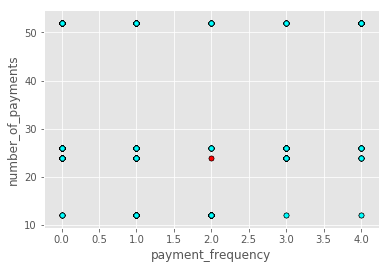

Variables: data_correction payment_frequency


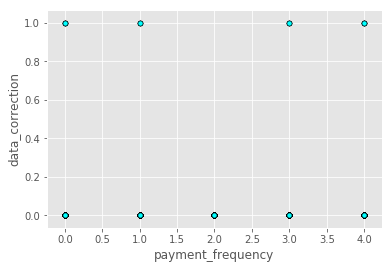

Variables: source payment_frequency


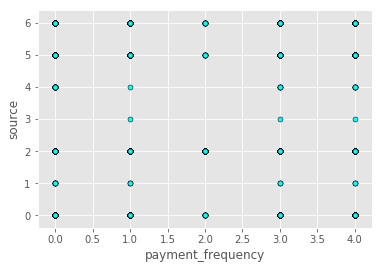

Variables: initial_decision payment_frequency


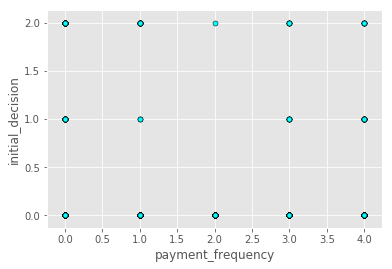

Variables: age payment_frequency


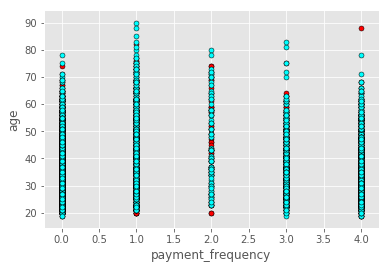

Variables: past_due_amt scheduled_payment_amt


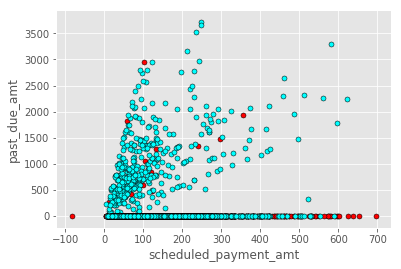

Variables: account_payment_method scheduled_payment_amt


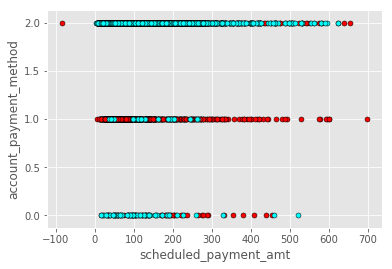

Variables: days_past_due scheduled_payment_amt


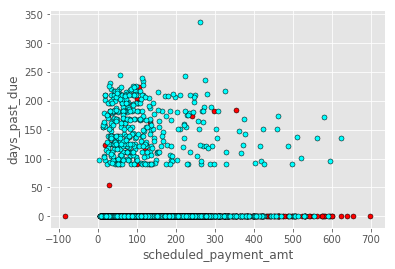

Variables: number_of_payments scheduled_payment_amt


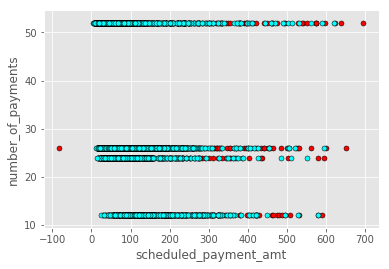

Variables: data_correction scheduled_payment_amt


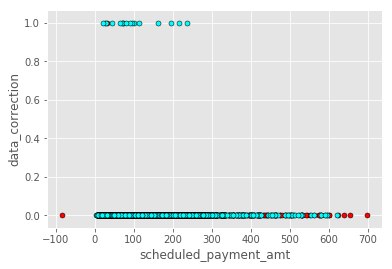

Variables: source scheduled_payment_amt


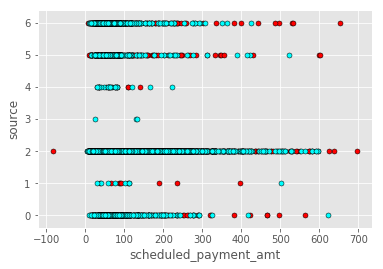

Variables: initial_decision scheduled_payment_amt


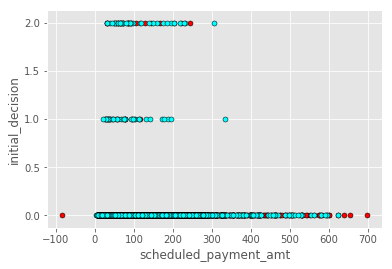

Variables: age scheduled_payment_amt


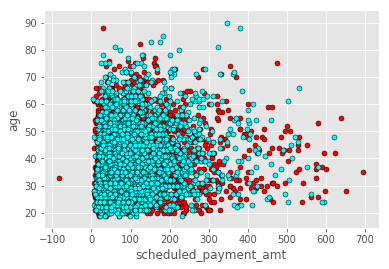

Variables: account_payment_method past_due_amt


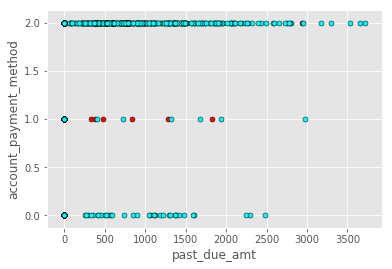

Variables: days_past_due past_due_amt


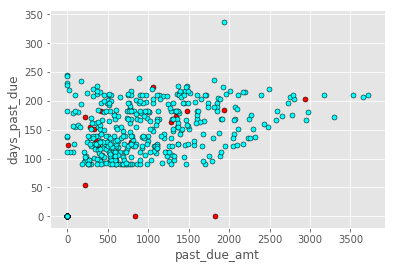

Variables: number_of_payments past_due_amt


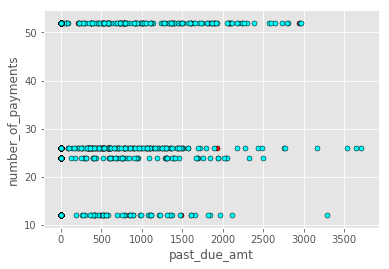

Variables: data_correction past_due_amt


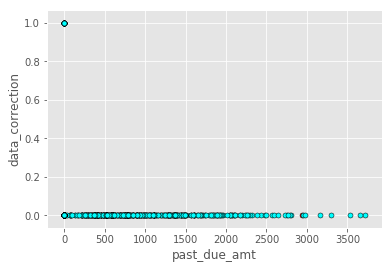

Variables: source past_due_amt


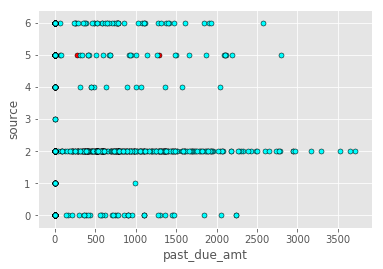

Variables: initial_decision past_due_amt


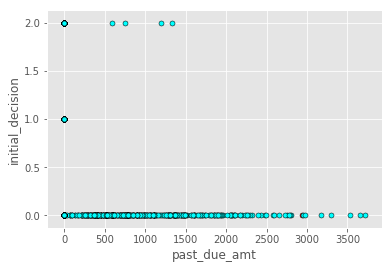

Variables: age past_due_amt


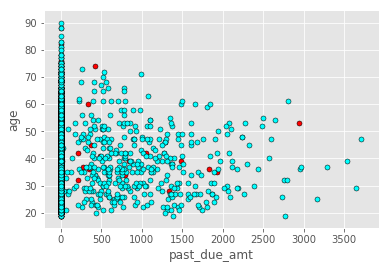

Variables: days_past_due account_payment_method


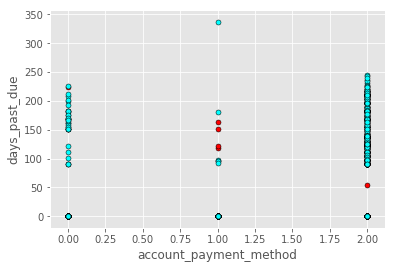

Variables: number_of_payments account_payment_method


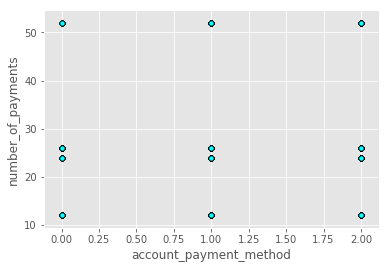

Variables: data_correction account_payment_method


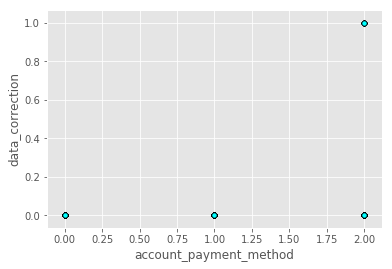

Variables: source account_payment_method


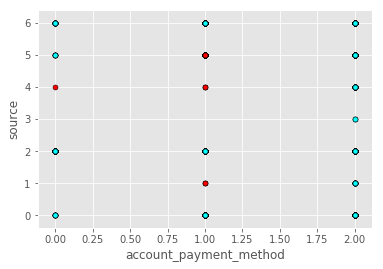

Variables: initial_decision account_payment_method


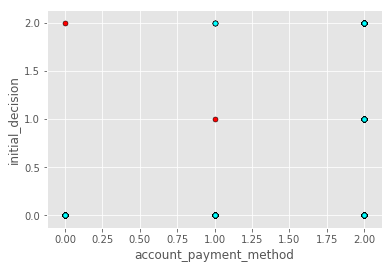

Variables: age account_payment_method


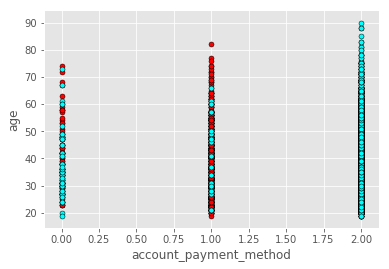

Variables: number_of_payments days_past_due


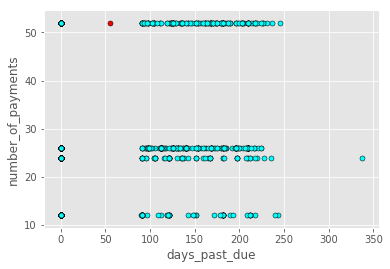

Variables: data_correction days_past_due


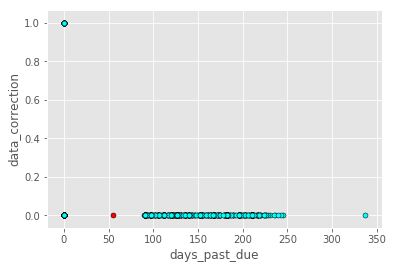

Variables: source days_past_due


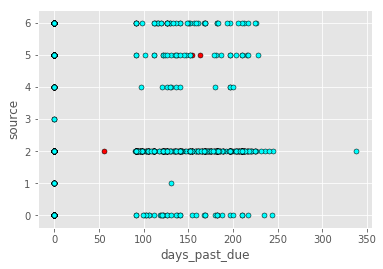

Variables: initial_decision days_past_due


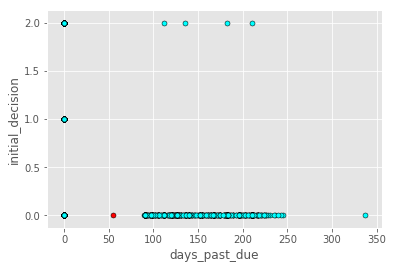

Variables: age days_past_due


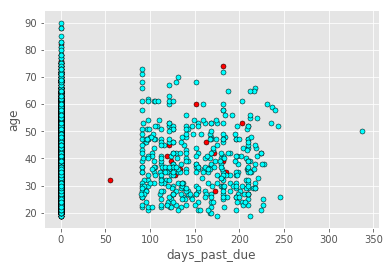

Variables: data_correction number_of_payments


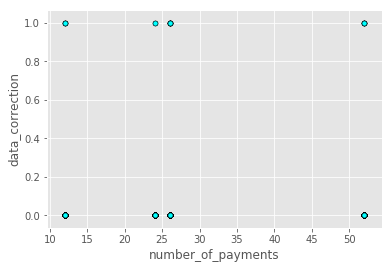

Variables: source number_of_payments


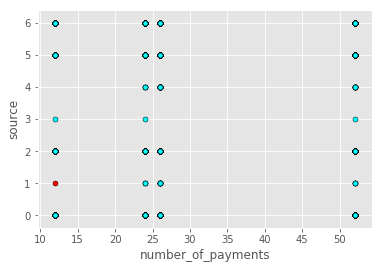

Variables: initial_decision number_of_payments


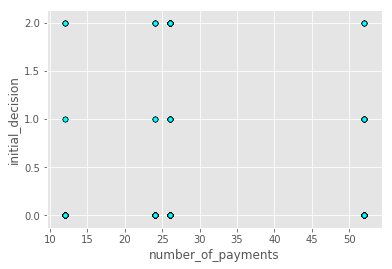

Variables: age number_of_payments


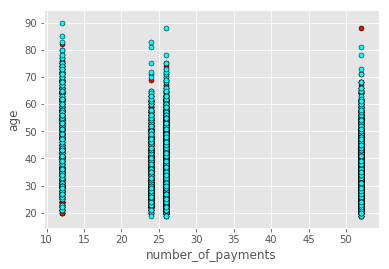

Variables: source data_correction


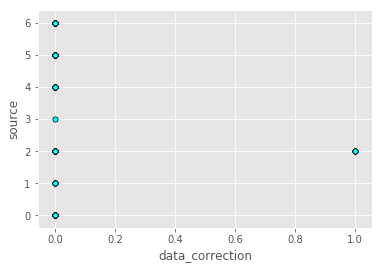

Variables: initial_decision data_correction


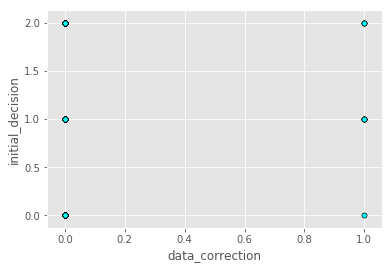

Variables: age data_correction


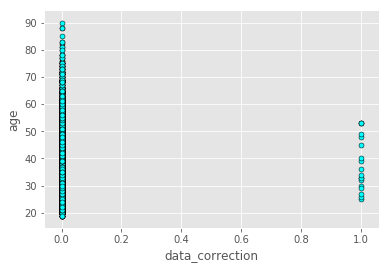

Variables: initial_decision source


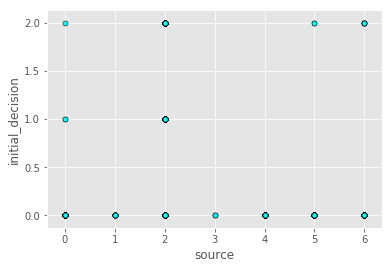

Variables: age source


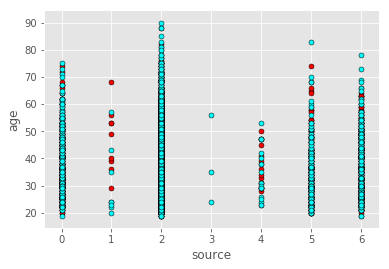

Variables: age initial_decision


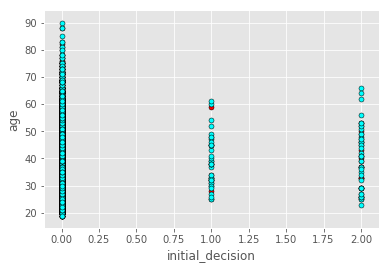

In [55]:
plotRelationsWithColumns(features,redeem_true_indexSecond,redeem_false_indexSecond)

### Analisis de los gráficos

Por medio de las siguientes gráficos podemos observar que las siguientes variables presentan mayor cantidad de dispersión.

- 'state', 'approval_amount'
- 'city', 'approval_amount'
- 'months_at_current_residence', 'approval_amount'
- 'scheduled_payment_amt', 'approval_amount'
- 'account_payment_method', 'approval_amount'
- 'age', 'approval_amount'
- 'city', 'state'
- 'months_at_current_residence', 'state'
- 'years_at_current_residence', 'state'
- 'scheduled_payment_amt', 'state'
- 'account_payment_method', 'state'
- 'age', 'state'
- 'months_at_current_residence', 'city'
- 'scheduled_payment_amt', 'city'
- 'account_payment_method', 'city'
- 'age', 'city'
- 'city', 'zip_code'
- 'scheduled_payment_amt', 'zip_code'
- 'age', 'zip_code'
- 'scheduled_payment_amt', 'months_at_current_residence'
- 'scheduled_payment_amt', 'years_at_current_residence'
- 'account_payment_method', 'years_at_current_residence'
- 'age', 'scheduled_payment_amt'
- 'scheduled_payment_amt', 'account_payment_method'
- 'age', 'account_payment_method'
- 'months_at_current_residence', 'age'

Por lo tanto de acorde a los datos que interpretamos con el random forest y estos graficos podemos entender que las variables mas importantes son las siguientes:

- account_payment_method
- approval_amount
- scheduled_payment_amt 
- days_past_due
- past_due_amt -  -   
- age
- zip_code 
- city 
- sms_contacted_ts 
- state
- years_at_current_residence
- months_at_current_residence
- source
- email_contacted_ts 
- payment_frequency 
- number_of_payments

Por lo cual guardaremos las variables que se han escogido, recordar que en este momento se cumplen varios **objectivos de la fase del entendimiento del negocio**, donde se presentan varios atributos importantes para evaluar las cuentas de crédito.

In [47]:
newFeatures = features[["account_payment_method","approval_amount","scheduled_payment_amt","days_past_due","past_due_amt" ,"age","zip_code","city","sms_contacted_ts","state","years_at_current_residence","months_at_current_residence","source","email_contacted_ts","payment_frequency","number_of_payments"]]
newFeatures['redeem_ts'] = labels
newFeatures.to_csv("DatosEscogidos.csv")

/Users/jasonsolano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


En caso de datos categóricos con one hot encoding, utilizamos el siguiente algoritmo:

In [ ]:
MLPDfp2 = pd.get_dummies(newFeatures)
newFeatures.to_csv("df_normalized.csv")

# Fase del modelado

Para este caso utilizaremos varias jupyternotebooks debido a que cada una consume muchos recursos y al utilizar un computador personal estos son muy limitados por lo cual solo utilizar un jupyternotebook para todo seria una gran carga para un computador personal.

Cada modelo describe las siguientes fases: 

- Selección de los parámetros
- Ejecución
- Descripción de los modelos obtenidos

## Primer modelo Redes Neuronales

Enlace para el jupyternotebook de redes neuronales.

[RedesNeuronales.html](RedesNeuronales.html)

## Segundo y tercer modelo arboles de decisión y random forest

Enlace para el jupyternotebook de arboles de decisión y random forest.

[ArbolesDecisionRandomForest.html](ArbolesDecisionRandomForest.html)

## Cuarto modelo catboost 

Enlace para el jupyternotebook de catboost.

[catboost.html](catboost.html)

## Describir los resultados obtenidos con cada modelo

### Redes neuronales

Se genera una red con las siguientes layer:

1 - 16 neuronas, función de activación: relu, drop-out: 0.3

2 - 8 neuronas, función de activación: tanh, drop-out: 0.2

3 - salida 1 neuronas, función de activación: sigmoid

Los functión loss: categorical_hinge
Optimizador: Adamax

Este fue el mejor modelo para las redes neuronales dando los siguientes resultados:
- Training Accuracy: 0.91639490068188556
- Testing Accuracy: 0.69785360464632473

### Arboles de decisión

En el caso de desicion tree el mejor accuracy usando la técnica cross-validation es 0.74 con los hyper-parametros 

max_depth = 7

min_sample_leaf = 10

Accuracy = 0.74

### Random Forest

En el caso del Random Forest el mejor accuracy segun cross-validation es 0.7540 con los hyper-parametros 

n_estimator = 1200

max_depth = 17

min_samples_split = 20

min_samples_leaf = 5

Accuracy = 0.7540

### Catboost

En el caso del Catboost el mejor accuracy en general es del primer modelo, presentando el mejor overfitting, entre la diferencia entre el accuracy del training y testing siendo un 50% y 49% respectivamente

Características del primer modelo

- iterations=3000,
- learning_rate=0.03,
- l2_leaf_reg=3,
- bagging_temperature=1,
- random_strength=1,
- one_hot_max_size=2,
- loss_function='MultiClass',
- leaf_estimation_method='Newton'

## Seleccionar el mejor modelo

El mejor modelo obtenido y por el cual seleccionamos para realizar la predicción de cuentas incobrables es del **Random Forest**, con dichas características:

#### Random Forest

- n_estimator = 1200
- max_depth = 17
- min_samples_split = 20
- min_samples_leaf = 5

Accuracy = 0.7540

Por otra parte con la utilización de este modelo obtuvimos los primeros análisis de importancia de variables y esto nos dio mucha información importante para estudiar cuales variables nos estaban aportando la mayoria de la información y poder eliminar las variables que nos estaban agregando ruido al entrenamiento.
Con este modelo logramos obtener los mejores resultados y hasta el momento el modelo escogido para presentar como resultados finales cumpliendo el objetivo de encontrar un modelo que presentara un accuracy mayor a un 70%.